In [42]:
from fastai import *
from fastai.vision import *
from PIL import Image
from multiprocessing import Pool
from IPython.display import FileLink

In [2]:
import cv2

In [3]:
ddir = Path("/home/edwin/Datasets/competitions/human-protein-atlas-image-classification")

In [26]:
ddir.ls()

['tmp',
 'test.zip',
 'train.zip',
 'train',
 'models',
 'test',
 'sample_submission.csv',
 'train.csv']

In [4]:
TRN_DIR = ddir/'train'
TEST_DIR = ddir/'test'

In [5]:
trn_csv = pd.read_csv(ddir/'train.csv')

In [29]:
trn_csv.head()

Id   Target
0  00070df0-bbc3-11e8-b2bc-ac1f6b6435d0     16 0
1  000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  7 1 2 0
2  000a9596-bbc4-11e8-b2bc-ac1f6b6435d0        5
3  000c99ba-bba4-11e8-b2b9-ac1f6b6435d0        1
4  001838f8-bbca-11e8-b2bc-ac1f6b6435d0       18

In [30]:
doc(ImageDataBunch)

In [9]:
TRN_DIR

PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train')

In [31]:
id = '5633eb38-bbc0-11e8-b2bb-ac1f6b6435d0'

In [32]:
path = TRN_DIR

In [33]:
color = "green"

In [79]:
def open_rgby(path, id):
    # colors = ['red', 'green', 'blue', 'yellow']
    colors = ['red', 'green', 'blue', 'yellow']
    flags = cv2.IMREAD_GRAYSCALE
    fns = [f"{path}/{id}_{color}.png" for color in colors]
    imgs = [cv2.imread(fn, flags).astype(np.float32)/255 for fn in fns]
    return np.stack(imgs, axis=-1)

In [59]:
im_rgby = open_rgby(TRN_DIR, id)

In [128]:
def open_rgb(path, id):
    # colors = ['red', 'green', 'blue', 'yellow']
    colors = ['red', 'green', 'blue']
    flags = cv2.IMREAD_GRAYSCALE
    fns = [f"{path}/{id}_{color}.png" for color in colors]
    imgs = [cv2.imread(fn, flags).astype(np.float32)/255 for fn in fns]
    return np.stack(imgs, axis=-1)

In [81]:
im_rgb = open_rgb(TRN_DIR, id)

In [82]:
plt.imshow(im_rgb)

In [60]:
im_rgby.shape

(512, 512, 4)

In [61]:
plt.imshow(im_rgby)

In [42]:
?? Image.fromarray(im_rgby)

In [62]:
cv2.imwrite('../tmp/s.png', im_rgby)

True

In [ ]:
cv2.imshow('../tmp/s.png', im_rgby)

In [43]:
cv2

<module 'cv2.cv2' from '/home/edwin/anaconda3/lib/python3.6/site-packages/cv2/cv2.cpython-36m-x86_64-linux-gnu.so'>

In [44]:
im_rgby.shape

(512, 512, 3)

In [45]:
plt.imshow(im_rgby)

In [63]:
cv2.imwrite('../tmp/s.png', im_rgby)

True

In [49]:
!ls ../tmp

df_sample_bbox_corners.csv  sample_with_bbox_corners.csv
rsna_bbox.csv		    sample_with_class.csv
rsna_bbox_sample.csv	    sample_with_target.csv
rsna.csv		    s.png
rsna_merged_labels.csv	    submission_0930.csv
rsna_prediction.csv	    test_results.csv
rsna_test_predictions.csv   trn_sample.csv
rsna_train_sample.feather


In [64]:
im = Image.open('../tmp/s.png')

In [51]:
! ls -lthr ../tmp

total 5.7M
-rw-rw-r-- 1 edwin edwin   27 Sep  9 13:10 rsna_prediction.csv
-rw-rw-r-- 1 edwin edwin  60K Sep 22 20:05 rsna_bbox_sample.csv
-rw-rw-r-- 1 edwin edwin 1.1M Sep 24 08:12 rsna.csv
-rw-rw-r-- 1 edwin edwin 1.4M Sep 25 03:35 rsna_bbox.csv
-rw-rw-r-- 1 edwin edwin 119K Sep 27 18:36 rsna_test_predictions.csv
-rw-r--r-- 1 edwin edwin 223K Sep 29 08:26 rsna_train_sample.feather
-rw-rw-r-- 1 edwin edwin 126K Sep 29 08:49 df_sample_bbox_corners.csv
-rw-rw-r-- 1 edwin edwin 103K Sep 30 12:01 submission_0930.csv
-rw-rw-r-- 1 edwin edwin  39K Oct  4 17:36 sample_with_class.csv
-rw-rw-r-- 1 edwin edwin 2.3M Oct  5 19:46 rsna_merged_labels.csv
-rw-rw-r-- 1 edwin edwin  49K Oct  5 20:38 sample_with_bbox_corners.csv
-rw-rw-r-- 1 edwin edwin  39K Oct  5 20:38 sample_with_target.csv
-rw-rw-r-- 1 edwin edwin  57K Oct  6 09:41 test_results.csv
-rw-rw-r-- 1 edwin edwin 125K Oct 18 14:59 trn_sample.csv
-rw-rw-r-- 1 edwin edwin  21K Oct 27 08:39 s.png


In [65]:
im.shape

AttributeError: 'PngImageFile' object has no attribute 'shape'

In [67]:
np.asarray(im).shape

(512, 512, 4)

In [70]:
plt.imshow(im_rgby)

In [71]:
plt.show

<function matplotlib.pyplot.show>

In [72]:
?? plt.imsave

In [73]:
plt.imsave('../s.png', im_rgby)

In [74]:
! ls ..

nbs  s.png  tmp


In [76]:
im = Image.open('../s.png')

In [77]:
im = np.asarray(im)

In [78]:
im.shape

(512, 512, 4)

In [84]:
TRN_PNG_PATH = Path('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png')

In [85]:
TRN_PNG_PATH

PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png')

In [86]:
len(trn_csv)

31072

In [87]:
trn_csv.columns

Index(['Id', 'Target'], dtype='object')

In [92]:
fnames = trn_csv.Id.values

In [93]:
len(fnames)

31072

In [105]:
def save_as_png(fname):
    id = fname
    im_rgb = open_rgb(TRN_DIR, id)
    new_fn = str(TRN_PNG_PATH/f"{id}.png")
    if os.path.exists(new_fn):
        print("SKIPPING - PATH EXISTS")
    else:
        print(f"SAVING - {new_fn}")
        plt.imsave(new_fn, im_rgb)

In [109]:
list(map(save_as_png, fnames[:10]))

SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/000a9596-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/000c99ba-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/001838f8-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0020af02-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/002679c2-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/00285ce4-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - 

[None, None, None, None, None, None, None, None, None, None]

In [107]:
save_as_png(fnames[1])

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0.png


In [111]:
p = Pool(8)

SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SKIPPING - PATH EXISTS
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10740fe2-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/385e14aa-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/28770b22-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/205291a4-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/184fc9e0-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/301951c0-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2060c2f6-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18618f3a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1087544e-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3019a292-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3870dbe8-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/288bc988-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/20681dc4-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/302d3c44-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18794a62-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/387bd116-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/08745aea-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18797d7e-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/30344198-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/087b4b7c-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/28b0d8c4-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/207dbc34-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3046e036-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3891fa92-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10a16252-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/087c290e-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0060269e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3061ba40-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/38a91562-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0881079a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10beec9a-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1892a9e0-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/28be0d70-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/006cde8a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0891756a-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/28c5be1c-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/209adbb8-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/38b95be4-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10ca5d42-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/30747832-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18c06b7a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/007d009a-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/20a8215e-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/08a49e32-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/30835d70-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10d7e96e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18c3c938-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/20bcd73c-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/309c22a0-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/08b6fdce-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/38d329c6-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10ece65e-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18d3fec6-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/008a8630-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/20cd28ec-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/009b8c20-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/28fc2000-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/30a60d70-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10fb062a-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18e6ed0e-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/38df3154-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/00ad4b4c-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/30c7e358-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/290bc596-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18eb4bcc-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1103f9ba-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/08cd43fa-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/20f21dd2-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11185ce0-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39025df2-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2105213a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18f5c6a4-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/30eb3db2-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/00b9bdcc-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/08e1379e-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2110702e-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/112395a6-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/30fb408c-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/390d0396-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2925e41c-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/00c9616e-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/08efb82a-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39177ab6-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/212c8410-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/00d7d192-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/08f98074-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29321dde-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19128b6e-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11303496-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3929964a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/00ed4394-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/090df0b8-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2936d584-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/113c465a-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/311dc9ce-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29372710-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/293b3cba-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19405cae-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1150987a-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/214c6116-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/312bb012-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11521b2a-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/01037b76-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39533942-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/115c24a8-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19473000-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/312ff002-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0924c044-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/011361ce-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39537cc0-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29627768-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39648ac2-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/011def6e-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/313ed2fc-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0932da7a-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11626950-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1952e090-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/093f1cb2-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1170bc08-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/296f6c58-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3154dc36-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/195c932c-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/117a5b76-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0141b838-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/09471fae-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/297da5a2-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2184f63e-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/315fe6f4-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11892850-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1968ae20-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/014a8bae-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/197fcbee-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/298ba7e6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/09599842-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/398ab922-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/298be4e4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/118ded1c-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2191df00-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3996f0d6-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/219eb042-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/299ba560-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11a99126-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/016bc38a-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19917094-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/31823cca-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/097197c2-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29a94398-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/21a961a2-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/018bc484-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39adf4b0-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/199f5e3e-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29adae50-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/09803248-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/01a2514a-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29b97562-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19ac3972-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/319b85b4-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29b9b0d0-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/21b9261c-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/31af7582-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29d3c288-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11d3803a-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39c837da-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0991d022-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19b53b6c-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/21c66634-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39d41a9c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/21ceb526-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29e837da-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11e28c76-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/01c87288-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/099bffe0-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/31be84d6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/21e37a9c-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/01d619aa-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/31dbcc54-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/29f54236-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/09a4622e-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/21e49422-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19d46a1c-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/31ef6d62-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/21f18d0c-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/01e7a2b4-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/09ba5fcc-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19de3ac2-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/11fcf2ce-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/39f67fba-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/01f3e0da-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19f0f1a2-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/220a73dc-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a074834-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/09cd2df2-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3202d082-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/01f58bec-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2215f4c6-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/121c1bb4-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a15fb20-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/09d8ddc8-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/02056070-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/19ff7e56-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/321664f8-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/32269eac-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0217b490-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1a156bd0-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a278f6a-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/09e11ca2-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/02199b60-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22200324-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/324339f0-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/022810e2-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2a5b44ce-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a2e4f5e-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1a24914e-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/123e1bb8-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2229cd4e-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/124c6914-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2a662372-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a38f6ee-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/023324a6-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22421830-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3259bc50-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a020f78-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a492cce-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/024476f6-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/32674ddc-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1258502e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1a4b9868-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22546860-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a0af552-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0258949a-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1a5d87b0-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a56751e-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/326f67d2-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2a883f2a-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a14ade8-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2261979e-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1a6bd32a-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/12803c3e-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0271c9e4-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a612886-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a3028e6-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/327f8d00-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22731788-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a72f856-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1297841a-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a478ea6-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/027c2e8a-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/328f5a2a-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1a7cb0c0-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2281cac2-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2aa67550-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2297f9be-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/12aadf3a-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a5cb468-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a811208-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/329b4a18-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/028ccf80-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/32a809d0-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22a212b4-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3a8f6594-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1a9ba930-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/02976c92-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ab58f76-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a6eb934-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/02a7b5ce-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/32b9079e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22b5b7a6-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a88df62-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1aad8f22-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ac842f2-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/12c42e0e-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/02bd4566-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1abb014a-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0a9705d4-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ad5c376-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ab16090-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/12ce411a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/32caca60-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22c8c5fe-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/12d86590-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ae38cfa-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0aa44542-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/12dbb2ea-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ac03858-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/02d2c686-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/02e2a5d6-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/12ea06b0-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2afc48b4-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ac9a87a-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1acfaddc-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/32f3bdf0-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ab81c8a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/330bf654-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22e53866-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ac345be-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ad6e394-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/330ed6d0-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/12fc81e8-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b1295a2-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b1d15e2-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ad0db12-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/22fc4510-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ae567e8-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3adc1714-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/332a1bc2-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0317d17a-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/130f7194-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ad8ef7a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/032a7200-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/23093726-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b22b792-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3af0a52c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3345c06c-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/335e8018-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/13254304-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/23157940-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/033c214a-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ae791ea-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/23162e5c-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/13290a50-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/132fd78e-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b43a784-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1b1c8c2e-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/034a37f8-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b12380a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/336bd63a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0af28b80-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03615f36-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b4e3550-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/337a03ee-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/13437d10-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b04e5ce-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/337f5224-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1345b398-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/134e229e-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/233a0498-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b2fdce8-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03833668-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/339552bc-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/134fe1a6-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1b35a434-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b663a20-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b55dcdc-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03886f76-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b286088-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1b46d63a-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/234db996-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b56f79c-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/136873e8-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b67314e-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2363a9b0-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b7ad210-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b37e1fa-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/33b7cd74-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0396a062-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b708c12-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03a36c00-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/137d718e-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2373402c-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/33dafae0-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b3fb8da-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b83f71e-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03b4ea6e-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/23854174-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/33e56f8e-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b7af758-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1b86601a-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b4bec30-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2b94f302-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b62f948-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b80c3ca-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ba53350-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03d13e56-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1b8ea3a4-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b8209b0-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/33fe0ae2-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34132274-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/23b17826-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2bbad5fc-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3b8ec0e6-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34161028-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b741144-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/13ab66bc-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03e0b692-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3428e490-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ba00516-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ba28bd8-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/13befde6-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b8bec5a-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2bc3fdac-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03f195e6-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/23d707a2-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34340b64-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3bb18444-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0b973b94-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/13caf87e-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2bda9976-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2bed283e-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0bac19d6-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/23e3fcc8-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3442f350-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1bca5128-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/03ff022c-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3bcee07a-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2bfe2556-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3bdab6b6-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/13df8534-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/23fbbf8c-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/040c1496-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0bbd8a84-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/344c8714-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/13f7055a-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3bf0ac3c-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1bea6f6a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0bd30b9a-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2c11a4d0-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3462ed18-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2408a74a-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0be5816c-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3c0251d2-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2c1886b0-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/041fa5c4-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1409a9bc-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/241aee48-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34731ce6-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c013c14-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24308fea-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/042b856a-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c10cb06-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/347e4cbc-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2c2cd422-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1417b400-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/141f68e0-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c1e8886-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34935692-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1420292a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c1bce14-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/043798f6-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24534e6a-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/044bd6e6-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2c4c8048-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3c30fdbc-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/142c9d96-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c290610-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c2d730e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34a3289c-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/143d7ec0-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c3db39c-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2c567304-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/247488c2-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3c4cca06-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c370404-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34b18f50-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c40f88a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3c5a25d2-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0470db52-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c4335f8-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/144afe5a-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2480d9ae-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2c6f1476-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2c83ee4c-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c585dc2-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c587bc6-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/048ef882-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24904a70-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34cf3196-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c590178-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2c997d60-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/04a3d0fe-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c632d48-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c6138e0-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3c7d61f4-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/146b174a-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34e07480-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34fa7330-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/04b385ca-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1484b1c6-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3c85e25a-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c6f99de-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24ba12c6-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/34fb01a6-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c7be93a-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2cb1859c-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24c9cf52-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/35142152-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/04cdab5e-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c7cb736-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c82a2b2-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2cbe5910-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/04e6f8f8-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c849bfa-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ca6cb3c-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24d054d4-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/14be0b22-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c8fddf2-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3cbd7426-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24e65516-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/04fbd60e-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1c9aa0b6-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/352fe2c2-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0c9a9148-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/14cb7a82-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0cac0d3c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/353c09fa-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24ee9bce-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2cd241bc-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ca919b0-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/050dc2ee-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/24ef7872-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0cc2abdc-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/14ea928a-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/354de4b8-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1cc3b416-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/250396aa-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0cc5182a-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2cdc4c22-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ccbdb0e-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/05302d60-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0cd484e6-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/251cbc98-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d07f3d2-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ccf6cca-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ced0ad2-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/355f9ea4-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2cfa7bc2-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0543c3c4-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1507c5fa-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2529e4ac-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0cef0266-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1cea2702-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/25435bd0-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0cfbad10-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d26dc4e-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2d099e16-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/05551280-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/356e4904-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1cfb0018-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15253b54-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d084784-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d43dce6-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/25513c16-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d170b5c-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/357a991e-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/255572ac-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d4bf332-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/05784754-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2d279bd6-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d188b6c-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d2019c8-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3581241a-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d4d84f8-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d267ed6-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2d3809ec-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/35910aac-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d549418-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/25771584-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15451232-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d3658e4-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0591f00e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2585dc96-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d42d4c2-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2d406f80-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/35a240d6-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d382a22-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d43a2e2-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/059f53c6-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/156ca0d4-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/35ba9500-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d69de66-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d59ed6e-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d4d2152-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/05a16868-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15740436-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2d5d8f10-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d5ef75c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/25951f04-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d712b96-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/35cd6a44-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d7db78a-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d6ef560-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/259ee7ca-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/05c03f32-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2d718038-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/158c9138-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d7e8238-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d8dc0a6-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/35e30f20-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d7aa1c8-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0d91024a-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1595a842-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3d9ef3aa-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/25be8544-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/05c5f690-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d8a2b4e-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15a2aa9c-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/05d40254-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3da76cc6-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d8ac4c0-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/35f02d4e-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2d982978-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d951fbc-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15b32cc4-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3dc3731a-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/05e2335a-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/35fd0e70-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/25d9a444-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1d9c8724-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3dce9e14-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0dd8f508-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2db31904-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15c44980-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/360c9950-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3dd00bba-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1dabf6de-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0deb1942-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3624ea60-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2dbcf952-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3de4800a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26008cc8-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2dbf7772-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3de613e4-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0627e054-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1dc07bc6-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2dd9907c-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0dfc7cbc-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15e3718c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3637492a-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/260ad954-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0e051cae-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26165ede-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/364ac974-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15eeceae-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/364be9d0-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26178090-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/15f1c82a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1de36744-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0e254292-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/262aaf80-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3663fdfe-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/065dc194-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e0ee874-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2df48890-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1df13128-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0e40a38c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e1d664e-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/066305ca-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e0397a6-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1609dae2-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/263deb9a-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e102788-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/066b8c0e-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1622da5a-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e2809be-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e0a58aa-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e107362-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0e562714-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e41e6fa-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26609920-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/06799c40-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/16318394-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/369de974-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0e6c61a6-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e1ac1da-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/266f22b0-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/06858b8a-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e312e66-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0e7eae4c-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/16530b68-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e277dbe-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e52503a-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/16628772-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/06918eaa-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e401402-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e655608-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/36bf8788-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e378f86-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e42db1c-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e44886e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e4e7d4c-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/36ce7886-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e7f3cf2-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/167620ce-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/36d06594-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/268aa9f2-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e502d04-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/168340b2-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e667b72-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/36d95a20-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ea51da8-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2695c7dc-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/06a53504-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e973e44-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/06b4fbbe-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0eb41896-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26a2fc20-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e754a76-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/36e62fa8-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3e98f42a-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e625b12-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ea65e48-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/36ef3d8e-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e830668-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/06c01f1e-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26b5c852-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ea745a4-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/16afa952-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1e9683ee-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/37063d6a-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e6c9d7a-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26c3cd14-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/06d620c2-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ed62d36-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ede5788-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/371114de-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26d5f742-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/16c60ce4-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1eb135a2-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e7a829e-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ed6bd3a-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3eec7b48-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/16d0b820-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ec7393c-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26e558ca-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/371c55b6-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2e92a0ae-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3eee1284-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/372922f2-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/16dd9e0e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07042fe8-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f028a34-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ef7c1fc-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/26effe48-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ed35b5a-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/373e7c84-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1edd9a1e-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f0b1068-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ead2d50-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0710ca6c-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/16eec8e2-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3f0cc8c2-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/374c693c-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07219c5e-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2eb2a198-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1ee81466-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3f264da4-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f208f94-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/374d5a4c-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1f04e8ee-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ebf658c-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f294318-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3f367b40-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1714e346-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/072d1418-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/271944aa-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/37723f8e-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/17246214-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f2f5ae0-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2722e696-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ecab68e-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3f43f38e-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f30bea0-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f484e72-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1f2511de-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0745705a-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/17352134-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/273c2726-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3781e9ac-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2eda3904-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1f2d7868-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ee6a2c6-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3f728d3c-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/174a8f88-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/274e7214-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07672386-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2eef43d8-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/275e9ece-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/175bd7ea-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07784d60-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3f8e6de6-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f6da6ea-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1f43745c-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/275eda3c-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1f4b6fb0-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0790c096-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3f92d0b2-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2f15d654-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/276a84ec-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/177356ac-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f892a0e-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/177c097e-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/079f3248-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/277f4476-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/37bc9be8-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3fa245fa-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0f99ee9a-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/177c91d8-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/178e2bda-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2791564c-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1f68f040-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/37cfed28-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0fa02600-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07b51d58-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3faf9390-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3fc76638-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/17a951fe-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/27ae7dda-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0fa5ab34-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/37dac41c-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2f4329d4-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/17aa1460-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07d2c0a6-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07d47338-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/27c1e3d8-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1f88c48e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3fda9ae0-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/37e4731e-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/17b7cdda-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/27cea68e-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/17c46940-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07dfdc0e-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/37ec1998-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1fa84b96-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2f5d67e4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07e1f7ee-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0fdb24b6-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1faf4338-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2f6bc9ec-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/17d30396-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/07f32ab2-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/27e26620-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3806de4c-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/380b353a-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3ff9a1e8-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1fbe4ea4-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0fe94e9c-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/080681c4-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2f7acfa4-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/27f4f6ac-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1fcb98dc-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0814e3fe-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/381da682-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1fcc1166-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0ffc7a84-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2803456c-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/081546f6-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1fdc307e-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2f94918a-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/180b408c-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/280d5c64-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1008111e-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1fdcf37a-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0828e820-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2822917a-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1fe3da0a-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/181443fe-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10142168-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2fa53fb0-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/383314f6-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/08376850-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3838e7ee-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1824ea00-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1fef8016-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2fb1d834-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/101de6ba-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0844b910-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/404b341a-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3847e86a-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/20064dbc-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1024d1d0-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/405469c2-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/0852388e-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10253f34-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/3848f968-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/102fea88-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2857f52e-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/406285ae-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/40b2409a-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/201114c6-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2fce6586-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/18469fba-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/48df1d2c-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/103e2ae4-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/40ba3640-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50a91120-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/201f4338-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2fdc627e-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/28698158-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2fe9a04a-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/40c84760-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/10541fb8-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/20410256-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58ec1dfc-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/40889e66-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2fe9db0a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50cd0eea-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58fd2a82-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/60cba06c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/48fbf434-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/2ff17150-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/409b9434-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/1068dd64-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/300123f8-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/40a29938-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/40e53246-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/60dafaae-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59078eb6-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/68caad54-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/40a3ee34-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70baf39c-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/49238bfc-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78c80334-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70bbf91a-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/60e73dec-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50e17256-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5917a040-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70cd1996-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78d3ae16-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/492f6646-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59212f9a-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/68f7a06c-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50f4626e-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41060e2e-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5101b14c-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78e051d0-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5930cc04-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/60fede7c-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70dbaaf4-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/49384378-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51032954-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70e6df9e-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/49462406-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78ed8788-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/593e41ea-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/510f388e-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61164274-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/691c9568-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70f2abbc-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41346a6e-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4955f24c-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78fb242a-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/594bd40c-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/611f734e-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5115b66c-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/693a829e-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61382bcc-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41485ea4-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/71059bd0-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7906c436-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4964c0b2-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59620176-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/415edd1c-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/512e29d8-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/614cdd0a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/596edcfe-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69490dae-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/790ca868-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4976926c-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/615657ae-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/597ae568-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4989e848-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/712adf16-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69546026-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41682592-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59829aa6-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5996ba84-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/514acc54-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6164eb70-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/713bff84-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4174f0a8-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/499a1028-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69617458-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51653634-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6967d758-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/79415be6-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5169c772-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59a4df72-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/616f8d72-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/714bb0f0-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59b03996-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/698a2a72-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41956134-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7155c88e-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59b17a8c-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/794ac0bc-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/698a2fba-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6995f83e-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51864554-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/419fef18-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/795cee40-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61830df8-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/49df0dda-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59d266fe-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/49ed2c0c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/59d9f8fa-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69b08d34-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61929fea-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51981f72-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/796b033e-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/71794844-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7188ecda-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61a141f8-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69c6658a-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/797b7936-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51a1e896-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41b8ace2-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a007ba6-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41cdc6dc-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/71988e60-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51b94a26-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a094552-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61b44dec-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51c0bd1a-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69ce9014-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51daf5e8-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5a159234-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69db5d90-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a172308-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/798d9b8c-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61ce44de-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41dad8a2-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a2b4d44-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/41f0b478-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/51e9709e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61d4eeea-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/79a48dd4-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5a277bee-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69e3929c-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/79ac8cbc-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/61ebd2b4-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a364eb4-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/42061ae4-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/71c8eb6e-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/79ae9c70-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/69fe5a7c-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/79c52ab0-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a113b9e-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/71dc7126-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4216d30e-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/79c644e2-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a3f771e-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5a40f9ea-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/79e203e6-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6213b412-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a47c466-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5243634a-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a29c18a-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5a49c110-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/42243a50-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a5614c8-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a370efa-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62230ba8-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/423392da-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7204ac9c-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/52558d7e-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/79fbbd42-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62269c6c-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5a759fd2-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a726f96-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a4243d8-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/721b3ca8-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5a7d446e-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62285bd6-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7a240a22-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/722d277e-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5a948d84-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5278f304-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a84c7be-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a51baa8-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4256eea8-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5aa2132c-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a5ed6b8-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5293dab8-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7239a074-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6247cb00-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4a93eabc-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4262ba30-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a6b54e0-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7a4abd7e-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62561a0c-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5abdcfe8-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4aab3c4e-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/52a1541e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a6da466-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6267ffc6-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4285c424-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5ac6c57c-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4ac1112c-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7252faa4-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7a5392fe-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a742486-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4acdf116-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7a65e8da-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4295727e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/52d2229c-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a8072b0-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5ad852c2-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/725def08-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/42a0cebe-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/52e3c4c4-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a87e840-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/726ec292-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7a7b6b68-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4ae1efde-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/42a2df3c-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/52f63c62-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7a8a4908-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62981296-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/42afa30e-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6298b5ac-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6a9ba800-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4aee2c0a-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62a30714-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6aa7bdba-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7a987a38-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7282edd0-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62a3b36e-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/530e7396-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/42c3ac2e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b073a24-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7aa82c74-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6ab7a5f2-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/42d53960-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b0d7acc-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62a918c4-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/531a69b4-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/532bced0-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/72a0425a-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ab2cece-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6acd57d6-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b1c0870-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62b47c56-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b153af0-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b220010-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/72af10e6-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/42f9edfc-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62c5afce-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6adb7410-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b257ef0-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/72b351e4-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/72c3bda2-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7abf93ac-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5347d28c-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/430f3958-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62d5f248-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b346bc4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b34d272-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43203352-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b083466-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/72ce4686-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/62e6cb58-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b460ba8-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ac9d5ca-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5353cbcc-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b4be292-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/536aeb62-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b56c138-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b20ec8c-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/432c120e-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ae1a48e-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/72e949f0-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7aecb3ea-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b3a1d36-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/72fa3abc-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43413ce4-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6306fc66-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/537e1922-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b5d441e-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b705f6e-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7afd5b0a-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43480eba-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b6a6396-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b48855a-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4349a3ce-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/73055b6e-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/632c9256-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b7f662c-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4b785a14-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/73174478-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b6020a8-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43672db4-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/53a3924c-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/437fa1ce-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/732b40d2-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b645478-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b8feb08-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/437fd786-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6342a08a-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/53aa7964-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5b97ba74-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b7f460c-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/53b4b044-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/63501786-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/733ff4ee-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7b2eb862-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7343cfc8-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4397ac5a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b8c2370-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/73665824-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7b429002-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6361aa70-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/53ca2998-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7367c4e2-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/73780a34-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4bb2465c-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43a8c8f4-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6b99668c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/636e164c-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7b564d44-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43a997a0-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7b6b6e86-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7391c0fc-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5bc642c6-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/637a9698-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43b96b0a-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7b713070-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4bcad094-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6bb542e4-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43c8b4d0-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/638ab60a-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/53f52e0c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4bd31c44-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5bd4c2fc-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7b810040-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43d8dc3e-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/540221e4-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/63aa12a6-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6bdcce6c-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7b8b190c-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5be2c516-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/73a9e260-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6bebd0e6-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/73bedd44-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4bf19fa2-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7b962f80-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6beda106-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/63ba210c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43ed031c-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/63c95076-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/541e77e4-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/43f68dd6-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ba52bfc-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c02daca-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6bfd5bc2-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/73d23dc6-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/63dc3e9c-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4c0c04c6-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6c0a6896-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5436c778-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c0fa7ae-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/440356c6-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7bb1152a-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5443ae8a-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/63ea5e02-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/441729a0-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7bb97206-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/73f8fed6-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c19fa64-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7bbd3b12-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4424da3e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6c352a32-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/74045f68-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c222872-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4c2e8028-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/63fdccc4-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6c390e42-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/546470f0-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4c3e3690-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44397d8e-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7bf6be00-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/74139cb4-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6c488464-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c38e518-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4443cf0a-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4c4c960c-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c03039c-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6c55d82a-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5473d4f6-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7420c8e8-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/640c45a6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c11a232-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6415d2a6-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/742f739e-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c4e37c4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4c7006b6-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/547c002c-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/444f7120-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/641e4b4a-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/548469d0-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c56eec8-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6c6cbc2a-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44650054-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c1d390e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4c7eb380-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6c7fd404-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/548d6944-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7445b928-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c268118-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4474774e-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6435133a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c6784bc-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c366792-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6447ae5e-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/54a58dfc-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c37650a-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4ca03104-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/74530a78-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4482ce7e-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/64560d06-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c4205b6-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/54b1e7c6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7465a65e-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/449893e8-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4ca77c3c-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6c9eb5ac-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c4dc740-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7470f644-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/64671e6e-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6cb4ad2e-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44a5e776-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5c92d568-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4caf8b76-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/748699d8-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c639fa4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/54cb339e-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44bf4728-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6476eaa4-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6cbb9bc6-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/74886650-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44d13db0-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c6c543a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6cda473a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/54d8499c-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4cd61586-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7497556c-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44d70272-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4cea9976-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/64a0e29a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5cc23946-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4ceb5924-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44dbe5ce-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/54f15d22-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/64a43d9a-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6cecef92-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/54fb844e-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5cd2d2ec-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44e397ae-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6cee4172-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c852990-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/64b36f6a-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/55076592-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7c9351c4-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/74cbc9c4-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5ce19ae8-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4d07ef58-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/44f58f36-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6cfa21ea-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d06f228-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4d1787de-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/74d68d14-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/64e418dc-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5cf314b6-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7cad6c86-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4509e7a0-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45125548-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/64f095d6-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5cfd1694-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5525c480-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d29fb2a-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/74ecf336-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4d1f613c-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6501da52-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5d137700-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/552d53fc-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4d26ba1e-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ccdd0a4-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/451dd946-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d3239c2-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d3989da-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/651486cc-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d3a7a02-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ce55a6e-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5d3022c6-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/452d9456-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/750d7306-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5d3723ea-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/751fbc0c-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/453ca1a6-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d4ac9fa-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7cef5f82-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5541b6c4-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4d48d06c-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5d460ff0-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d56c480-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4552b8b0-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/55518ee4-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d56fd16-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/752df0bc-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d015b36-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4d6b89ba-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7543163e-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d671696-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/655c1692-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d17801a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45621e96-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d679ddc-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7555d260-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/656a214c-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45722202-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4d7baf0a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d7aa96c-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d282f58-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/55861a6c-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d83f5d8-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6577326e-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/457a6194-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4d88bd9c-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/558dfed4-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/457daa02-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/75633fd2-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/658488e8-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6d8fcb1a-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5d8c5f6a-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d4526f8-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/55a6e226-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4582d306-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4da64b48-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5d9f652a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d53254c-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/55b8e2bc-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4dc066d6-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/65969d72-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6da88706-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45916b0c-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4dd7c974-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6db0c9aa-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d5a1a36-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/659dd7f0-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4dd980c0-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5dad3322-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45a6eb56-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45b23c18-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d649cba-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6dbac4aa-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/75a491ee-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d65f6a4-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4de8e49c-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/55df8d20-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/75b34720-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6dc893d4-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4df2cb98-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/55ed3054-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d79ea24-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/65c87e04-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5dc4ca68-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45c794ce-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5601e92e-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/75bbce68-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7d8c10e6-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45c97756-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/65da950c-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4dfee810-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6dd90882-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/75cd0aae-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/560c0da6-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45d5f5fe-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/65ea507e-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7da41ac6-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4e07fe9c-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4e10b90a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/561bc692-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6de6a8e8-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45e5bf5a-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/65f44b14-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7db4418c-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5dfad250-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76006840-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5626172a-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5e04c4f8-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7dc4e6dc-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6df4016a-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/45fc044a-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4e28245a-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/460664f2-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e041f16-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4e352734-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/56452c42-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5e14476e-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4608e222-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/661d464a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7de14424-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5e22a522-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/565e6716-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e0f0e5a-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7625dd98-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5e234af4-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/662f0860-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/762fd0d6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46277d7a-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/66400800-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5e387924-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/566edc5e-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4e580aa0-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7defb9f8-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4e699a0e-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/567fd0d0-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7dfea128-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e2f4fe4-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/664e66ae-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5e42414e-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46391084-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/464e9570-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5e5a1c52-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e3b3c00-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e0ceb58-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5689d3f6-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4e868226-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6658d460-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/766591e0-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/569e1e6a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/666a3e10-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e1a7a40-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e4123c8-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46624022-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7666cca6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/56b608e0-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e5674a0-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4ea2f718-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/766d850a-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/466b8370-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e5b0638-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6676157a-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e70061c-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/467775d0-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4eb199b4-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e499e8e-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/667baaf2-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7680dcb2-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e7214b6-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/56d80dea-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e6068f0-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e86aace-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4ebd5498-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46864fe2-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/668ff00c-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5eb6298c-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5ec7cf80-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76a14da0-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/56dfc700-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46a04f78-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6e95ccfa-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e716680-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/669f4d7e-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4eddd750-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6ea13c7a-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e7f99b8-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76ab45ac-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5ed9def0-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/56f0f832-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e7f99e0-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4ef9e3ce-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e8ca5f8-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76bed770-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/56fbf3f2-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/66bd5ffa-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5ef46d02-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6eb6107a-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6ecc981a-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46cc8182-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7e99faee-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5f005cfa-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/66c492ee-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5f0267e8-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f015320-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6ede1a7e-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46e4970e-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f10d3ba-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76d4d8b8-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57156fcc-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/66d88f98-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7eab2cde-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5f1ec064-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7eb9ca38-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46f39244-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/572b827a-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76de53c4-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5f207f02-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/46f504d0-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/66fc4e40-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6f0433e0-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76e9c66c-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f26c210-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/66fdcb2a-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ed2df80-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57368a94-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f35f360-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/574327b2-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/471646d2-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6f0c4f76-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76f8a344-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ee3439a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/76fb863a-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57513f5e-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6720eca4-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5f46bcf0-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7704c3aa-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f41df44-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7eeec51e-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7705530c-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/77132d7e-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/672ff4d6-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/47463db0-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5f577172-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ef85028-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f47c4b8-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/77133b3c-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7f0a1f9e-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f557c5c-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/673c3320-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7721d9f0-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/576b7ad0-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6f303dfc-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/47580066-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5f8329c2-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5778fd2c-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f6666da-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6744bb14-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/577a1946-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5f83e9d8-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/47660aca-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/578b2c46-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f737954-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7f3f1006-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6752393e-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/774adde4-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7f41e3e6-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f763ce6-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f870426-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/47853292-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6f4efdb4-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7f5c7458-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/67610462-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/775aa1a6-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/579c0e42-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/77622b4c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7f61b9b2-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6778bdc0-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4790b4ae-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f89f712-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57acc0a0-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5fa15784-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57bcc84a-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4f9c8570-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/678b320a-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57bd60d8-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5fb18b2e-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7f76d9ae-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7771774c-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5fb9d718-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57d0060a-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6f835642-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/777ae856-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/67921ec0-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5fb9edb4-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7f836864-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57e1a3ae-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6f9aedd6-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4fbd5cb0-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/77868626-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7f9e5952-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/67a176c6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/47cadfce-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4fd09594-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/67b7822c-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57f36d42-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7793ad42-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7fac5d5e-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/47d58bec-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6fa7c9c8-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4fdf76f0-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/77a2b728-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/57fe0520-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6fb703a2-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5ffa04b8-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7fba7996-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/47e6a7dc-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4feba6cc-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6005ea1c-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7fd3e170-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6fc89c70-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/77b6917a-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/67cccbae-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/47f4e74c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6015f732-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/581b54c2-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/77c0fbbe-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4819f1aa-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50023de4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/67dfa8dc-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7fe8d8c4-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7ffae4c4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6fea8738-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/483237ce-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/601c92ca-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5837d9f0-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/67fc19b6-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/500e1fa4-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70019842-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58428b0c-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/602acb0a-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/483d7c40-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8015548e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7001fc02-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50225a56-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/700d365e-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/584e8d3c-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/48496604-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6041d24a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/584eaba0-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/502a2838-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6817e632-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/701f0316-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6836a1d6-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/803f16be-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6053343e-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/48697932-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/585ca45a-bbbf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50385e4a-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/586f4f04-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78049894-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/605aa164-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78068fb0-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/586fa8f0-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/685229d6-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/48759e56-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58768bb6-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/606c3796-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/504c80e0-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/685cd1cc-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/703c8082-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4889d452-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58793a0e-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/6867d186-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70485e4a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/4898fe0a-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7841a0c8-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50580dfc-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/608b04e8-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/806933e4-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/687996d4-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8078d0ee-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78629768-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/589b42a6-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/687e45e6-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/60999926-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/7054cc08-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/507161e0-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/60a7bb88-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/48bfaf38-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70682e9c-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58a6e932-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/50731cb2-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/68934082-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8097c246-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58aeec9a-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/708097e0-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/68a3f5f4-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/5085ee60-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/788b974e-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/80ea0dc4-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/60bdc8e2-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/68add870-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58b9acb2-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70a09fb4-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/509599d0-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/80a3647e-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/80f422b4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78984c9a-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/70afb5e2-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/58d3a69e-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/80b821a4-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/80fcafb4-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/88df0b2c-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/68ba96e8-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/88ee7afc-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8107a248-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/78b00d72-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a08d8b9c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9888ac9c-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/80d48aee-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/908fd6d6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/989a7b52-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b075a1c6-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9098fdc2-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a0996544-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/88fcc8c4-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81179b46-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a8541a06-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81245360-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a86368ee-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/98ac565a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a0a8d658-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/890de702-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/98b00a36-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b07f66aa-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/98bb984c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/89246cec-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/90b0d3fe-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/813e151e-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b84cb64c-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a86a4aa0-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b08d19da-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/98d01c9c-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a875c9fc-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/90b95f70-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8578bd4-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81483006-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b09e6f00-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/89416ba4-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/98e4ee22-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0a26566-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81547ac2-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/895410f8-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0a521bc-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/98e757f6-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a0c85d5a-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0ad66a8-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a896c23c-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8164b97e-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a0d5dfa2-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a89a601c-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/98f3922e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0b05cfc-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/817797fe-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9900b7f4-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0bcadd4-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a8aa5cfe-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8178be52-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/90fa5a5a-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8895ca6-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0c129fe-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/898964c6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/99115644-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b897205a-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9113bbd2-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a0fd8b18-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/898acf24-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8b0889c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8990b0dc-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/91270b0a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/991cd592-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a8c57dea-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a10d2d92-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0d10910-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a8d34a72-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81a88a82-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0dad832-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8b9cda6-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/913b3584-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81aa4fd2-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/89ac3b92-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0f029d2-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9144e014-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/89b706e4-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81c1ba14-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a13438f4-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/993cbbd2-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a8e736c0-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8d9cbfe-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0fc6d14-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1465ff2-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9154beea-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8db558e-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/994e3826-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/89d84aea-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b119bade-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8eea0d4-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81eade8a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/996cd6c0-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a90db1aa-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/89e380ae-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a15d2f8c-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9175e5e2-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8fbf760-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/99786f48-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a166568a-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/81fc9b00-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b12cd5c2-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a925ef9e-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/99863f1e-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a931388e-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b9180886-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9189e702-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a16f8a62-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/820e77a4-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a932b36a-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b150571e-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9195c12c-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a04ec5e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/821caeba-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a17ce818-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b927ef4a-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a956044c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/99abe586-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b93372c6-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1846764-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a15bb26-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/91a01e5c-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a960c644-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8231ba00-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/99b8494a-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a190e486-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1685f6e-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8236eb22-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/91ae3836-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/91b1544c-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1688ce2-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8249275c-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a98c5f30-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1a368dc-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a3e6960-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/99c49c6c-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b94cc78c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b178b306-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a9aae780-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1ad4bbc-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b956696e-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a48ae9a-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a9aaf8ae-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/99d586f0-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1897240-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1b4dcf0-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a9ba4f7c-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/825786fe-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/91e50cd6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a5ef75a-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b19b1976-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1b5c1bc-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/826092c2-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b9736050-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a651352-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/91f08266-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/99f2ab06-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1a949b8-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1c4e742-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1cf1fb6-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8275ae98-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/920a6de6-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9a078aac-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1b14d8c-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b986f4be-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a750574-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1b68e32-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8285218a-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/92116698-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a9f76a34-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a803934-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b99bdc78-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9a20eb52-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a869d9e-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a9ffeb38-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a1f8e71a-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9a26698e-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b9b817c0-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8293cd40-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9221de94-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a212602c-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1dd46be-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b9c60af6-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/829b6456-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8a9cfdd6-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b9ccf63c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/92316bbc-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/82a33530-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/923c6018-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1f15f50-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b9e66f66-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aa23be2c-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9a45fdca-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a21c4c74-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b1ffa7b8-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2234f7a-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ab07b54-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9254986e-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aa3fb18c-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ab2f848-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b2020902-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9264678c-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b9f67ab2-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a22facc2-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b213106a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9a65f902-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ac44d34-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aa60991a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9a777dc6-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aa6b0db4-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b22a3178-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba086f7a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a236f20a-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/82e0b86c-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ad202aa-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ae721ac-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b238f594-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/82ee644c-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9294c808-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aa81349c-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba10a22e-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/82f53df2-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b24e7406-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba22a5ca-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8af18698-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9a91ea6a-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aa8de416-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2550930-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b24edf8e-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a268a1d2-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aa990010-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/92ba3d92-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8aff2a3e-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b2653608-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba322b52-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/830d6e4c-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8b0e3b1e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b275491c-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a27998ba-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aab29912-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9abe701a-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/92cf00ae-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba3bec7c-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9aceb874-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba413e46-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b2801d24-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aabfc926-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8b252b16-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/92dad3fc-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8330cfd2-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8b3547ba-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/92e7bb40-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2aa4602-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/833af3e6-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9ade6bb6-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b292fdac-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2ad3eea-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8b4590d4-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2b97a38-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/834237be-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba6506cc-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aae04ae0-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9ae3fb62-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aae4ac90-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2d7c33c-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba7c54c4-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/834e1724-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/930000f2-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/930003ee-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b2a44178-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2d86d46-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9afa44ee-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab03b420-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2e2d230-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba85de70-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/835e2c6c-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9317c9e4-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8b65995a-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab1f18b0-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ba9394d6-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b2ca15de-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2edf428-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9b0e9ba4-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/932b4fae-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8b6e05d4-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8b7c6abe-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8376c604-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab2b5248-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a2fb9772-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b2e0c0d0-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/933bec40-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9b34e052-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/83895fd6-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8b8b19ba-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9b3e4364-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab385b2e-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a3120906-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bab8db6c-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b2f261de-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bac22fc6-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b301932e-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab432aa0-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9359eaae-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3033b86-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a3248228-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9b5a6cf8-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8bb6956e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b30b4f14-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a341502c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bad0e24e-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9b64fc9c-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/839fa798-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8bb8dd32-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3267f2e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/83ad03ec-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8bc9b9fe-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab5b0766-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a34fe090-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9b7158b2-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/93832046-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8bdaeab0-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9b8e7b32-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a364e3e8-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b33cfa9a-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9388fd96-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab5fac44-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8bdbe994-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9399b486-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b34a3372-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a371ffee-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/939a7df4-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8bed20cc-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b34ab50c-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/83c47476-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/93a70adc-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb07875e-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a3820aec-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9bafef8a-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b36313fa-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab81abb8-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/83da5670-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab95e208-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/83e44b9e-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8c0f8918-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ab96813a-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb138142-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b36c62ba-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a38d2f6a-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aba6bd16-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/84009514-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb2232c4-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/93c8c8e6-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8c21e290-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3773316-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9bc13520-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb30b670-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b385591c-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8c2a5454-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8418f418-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/abb604c8-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/93d2a15c-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a3c11796-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb386892-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/842401bc-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9be1c346-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b39b85d0-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8c3c259c-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb39df1e-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a3d43a88-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3a29362-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/93f6e194-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8436bfd8-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9be84f30-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a3df2554-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3a3c22e-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb4c744e-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8c4d3d88-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3aef220-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9407c75c-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a3e5d546-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/abf070a8-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9bfc8ad8-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb5ae528-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8c668e80-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/940f418a-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb70037c-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3c20e0e-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/abf85e36-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/845aabbc-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a3f7637c-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/846a8ade-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8c7fb71a-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a4018648-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb81b060-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac007074-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3cf3ca8-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8c85ea40-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3e1ca10-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bb903172-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/942bd9d8-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/84826c42-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9c2c592e-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/942eec14-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a40a4aa6-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8492a678-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3f18be6-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9c47d392-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac245614-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a410cc82-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ca23ba6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bba7cc06-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/849deab6-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8caab8a8-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bbb7d938-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a42555aa-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac2fde34-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/94526d8c-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b3fa54f6-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b404ca62-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9462138e-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac41dbbe-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/84b43a84-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a4402e3e-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9c5f3314-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8cbea5ca-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bbedcf24-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8cd400e8-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a44be996-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/84c0d8e4-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac5b537c-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b42540a8-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9c6ed696-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a461e6d4-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc027260-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8cdc3a94-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9c7a9f6a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc03073e-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/84d027d2-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac654752-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/94948ccc-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/84da22ca-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc13fb7c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a46bbd26-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac804310-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b444e240-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9c8be280-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac8b206e-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/94a32f92-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc1e8d72-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9c9b891c-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b44fbc9c-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a47d3652-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ac8b4aa0-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc32420c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8cfee330-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/94b41236-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a48a8c26-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/84ff52bc-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b4637096-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8cff4924-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc3a40fe-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a4a6974a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8519f660-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b47175d0-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9cbb6762-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aca3dfe8-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d039c06-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/94cded10-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9ccd965e-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d0a8f62-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a4bda7fa-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85329c4c-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b482964a-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aca9d5c6-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a4d045ee-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d1dee46-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/94e15b94-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/854657d2-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/acb4339c-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b48bcd6e-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc644030-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9ceba63a-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc720b98-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/94eb5e20-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a4e2cf2e-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/854b00be-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/acc5291e-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d2b7a94-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d40940c-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b4a64e7a-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9cf9a3ea-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d40ce1e-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a4f37b6a-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/acced030-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9cfd87a2-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85600f66-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9d1809a8-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d517934-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b4b3be92-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/951084a6-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc899740-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/acdc628e-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc99fb74-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b4c40780-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8573a21e-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d5fc100-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a5120912-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/acf61102-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bc9a4a4e-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a521c1bc-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9d29c71a-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85846a50-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad0c037a-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d6c1b06-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a5228276-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bcac6f7e-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bcbe87ce-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d7618d0-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad180f4c-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a53842e2-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b4f3876c-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85945c14-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9d3f788a-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b4fa21fc-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a53f4856-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bccac2e0-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d830db2-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9d500dee-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/954ea85c-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85a0b084-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9d5ba7a2-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85ac0884-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b507b0f8-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad3be804-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bcda0cf2-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/955f485a-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8d933d32-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85b16e4e-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/95850fb4-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8da6db58-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a56bf186-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9d693818-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b516312a-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad4a48b0-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad618ede-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/959b8e90-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8dacec52-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b5284ca0-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85bfb7e6-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a5763bae-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9d6d6822-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bcfbc790-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/95ad0b44-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85d3b8cc-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8dc1c59e-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad70b5b8-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b54161be-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a58a9778-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a59548e2-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd112504-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85ea06be-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad792af0-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/95c1f304-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd131aa0-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8dd7ef28-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a59bb46e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd2cfd22-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad87ff08-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8de7264c-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ad8e53bc-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/95c67da0-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/85ffab0c-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ada85cc2-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a5a9fa9a-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd3e3c46-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b5788728-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8dfaf31a-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9da5e832-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/95d85fae-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd4f9c5e-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/adb38796-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b5854fa0-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e14599e-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a5b8e4dc-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9db105fa-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/95e3606e-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9dc4f69e-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/95f0c6bc-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd596b60-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e1a9714-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/adc3e782-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9dc79d30-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a5c7bae4-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/add97b68-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b5a7ead0-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a5d68b8c-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd643b36-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e2962fa-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/863feef8-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9dddb308-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96068776-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/864a4e6c-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9de54ea4-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b5b66a8e-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e35fb82-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd76169c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ade3f336-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/865ea320-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9618d35e-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e48627a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd820a2a-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b5cd6204-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a5f1fea0-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/adf15c84-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8677c04c-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e53e680-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bd8eb284-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/962acc9a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/adfdbb66-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e01b98a-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b5e03b30-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae1619b8-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e0e94c2-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bda64b3c-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b5ebbc40-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a6089970-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/963c3d24-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e723cea-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae26ae6e-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a614a0b6-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e7b085c-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bdb1e8d8-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae2772a4-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9650b0e4-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e233706-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a62876a2-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e83629e-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e3ebcf4-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae3687ec-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9662468e-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6031da4-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a62aba86-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a6333bac-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae3fcada-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e4e19de-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8e92162e-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/86a87962-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b60e6f2a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a63505ac-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/86bc67f4-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9698a620-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bdea20b6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae4ddcce-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a641e290-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e678260-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6298e5e-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae56dd70-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/86ed70e8-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b638debc-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a658e282-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96a0e154-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8eabfce6-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e761582-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/86fd7c2a-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ec0a314-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a669b0be-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96aa54be-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e82d34c-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae6eca2c-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be18e420-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e88b96c-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b65524ce-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96b824fe-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b655b6a0-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be2a03b2-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a67692a8-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6567bb6-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ed664e2-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96c2d694-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9e9b192a-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/87182ed6-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ed85288-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be3fd5ce-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6650e84-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9ea47eb4-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96ca4bce-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ae9cf72a-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/872abbe6-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a693bacc-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ee5ea8e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b671593c-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96d6dc2a-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6862aa4-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/87418bb4-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a69f87dc-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be572a70-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b68bc9a4-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aea7c94e-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b69656be-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a6ad6be2-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aec14c94-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/874ee980-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be672ea6-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9ecf92ea-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b69d1036-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9edd375a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a6b50ebc-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8758c2f4-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be77dca2-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8f17b5f4-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96f2069a-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6aae78e-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6b356c2-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be89c7d0-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8768a5ec-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/96fd4076-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9ef1bc92-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a6be0112-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8f26589e-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be931be2-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97056704-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9f11b8cc-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/aeeafa8c-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a6c9d692-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6be2366-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/be94f236-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9719b582-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9f3204e8-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6cff096-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bea6cbf6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8f34e9aa-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af04b13c-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8786853a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9f4275f6-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a6e0f53c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97289074-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/beb320a4-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6dad0f6-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8790122c-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af15fab8-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8f4630aa-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af34bdbc-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/972f755a-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b6f82dd0-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/879fec3c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8f499216-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a6f1e954-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9f61ee80-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8f546902-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bed53512-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/973e1604-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/87a7eb54-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b707ed82-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af4644f6-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af4ab20c-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bedcd3d8-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97471440-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9f71c3e2-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8f5b3614-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7198858-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af4acb7e-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/87c78c2c-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a72b308a-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9f7aebc6-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bef3365c-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7320dba-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/87c7f4b4-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/975c8fc2-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af6c9f66-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9772b884-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8f7e4124-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/87d1b4d2-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/beff1bd6-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af6d2402-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9f84493a-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf0a7416-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a740470c-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9f9ba1f0-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/977ebdbe-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7590ffe-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af7e3ef2-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf0b0dea-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a754fa2c-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf114a6e-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9fb28b24-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7628ace-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/978aa4ca-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af8bac12-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/87fd9c1a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf20f6bc-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8fc3f866-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7721dd0-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8810d718-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a76ee446-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/979d7e0a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/af9b6d76-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a77c9e48-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b780bb98-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97aa35a8-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8fd0c9b6-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf37e5f8-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9fd02230-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/afab569c-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b78fda0a-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7887c50-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97aea894-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9fdde98c-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf43de90-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a78b0fe2-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8fdf830e-bbc2-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a79851d6-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7a108aa-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97bfdf88-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/8ff5ddee-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf56cd90-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/88468830-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7a22116-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7aec426-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7ae0fb2-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/900aa6f6-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a001731a-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/885a46fc-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97d27fc4-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/afd8964e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7c891fc-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/886e6e5e-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a00697cc-bba4-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf785268-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/901ccb8c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7bc77d8-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/afe7c11e-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/888458fe-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97ed4a38-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a01dd2aa-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9027ecfa-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf8c8550-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7d5d76a-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/affd4f82-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7dc7b90-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a026c666-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7d9d1e0-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/889b5a6e-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bf9eba7a-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/97f71fc0-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9032a04e-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b00d9294-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7e70d40-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bfaff2ea-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7ea6e18-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/88b36804-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b012efde-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a037cf8a-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7f8bae4-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b02cfabe-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/88ba3ed4-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/981cafdc-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a7faf0b4-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b7f2ea10-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b02f5c20-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a80889f2-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bfcad1ca-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/982bf832-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a0539c68-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b03f4a7e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8030a08-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/904fb37a-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a80eef74-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a06cf3b8-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8162afe-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b04643dc-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/9839980e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bfd7b3b6-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a81132f6-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bfe5e5ca-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c02e8428-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/a072d6c2-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b0548738-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b829943a-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/984a619c-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b05652ce-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b06269b6-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/985cc034-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/907458a8-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0415d60-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/90770e4e-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/b8339774-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c042eeda-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c81b8c66-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d81e0ebe-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c04ea5e4-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/bfffa942-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dfeb10f0-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/986702ea-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c81ca0d6-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d8286540-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d02e8d72-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d82a7ec6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0604774-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c839388a-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/987d7236-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dff506f4-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d037788a-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c84e42b8-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7fddea0-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dffd27a4-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/efefda68-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c84eb0a8-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0731fa6-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c080e4e6-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eff83e48-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e00f7cb2-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e80e6f9a-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d8471fd6-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d0443ed8-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c859dc54-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f819e5e2-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8670266-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d050839c-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e81a10e4-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c095e742-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e022d4a0-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f0034882-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d85ffa00-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e030c00c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f82d1bac-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d05e8e7a-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e830e098-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e030f93a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0a3fd92-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f02012e6-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0b4f684-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f83ab800-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d86a8002-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c877fc2e-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e04212fa-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d077023a-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0ba9c10-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d08a0460-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e852144e-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d87b86ac-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f847bfa8-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e05a2022-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0bc5a00-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e85b1272-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0cdc528-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c896eb04-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f041df7c-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e0745cb2-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d8898018-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0cf1c82-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f859385c-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f055e774-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e0833770-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f85a0328-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d0aef600-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e862bcbc-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d89478be-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f870ef7a-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f06d16da-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d0bee052-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e0938fb0-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8b0adfe-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e872d3bc-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f871cf4e-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e88bc9e4-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c0f7fc0a-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d0ca6662-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8bf34e8-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d8c04f8e-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e09c87e6-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f07a364a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8cd459a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d0d6f868-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f08643b8-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e89acb58-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c1015a9c-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d8d03b4a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f0885dca-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e8ac9d64-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8d702d0-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f09a444a-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f89de854-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c10e610c-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f8a1d2d0-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8d9e128-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f8ad58ba-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d8e9635e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e0d03c60-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d10095a8-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f0acdb08-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8eaf9d2-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e8c2ef38-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c12fbfca-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f8bedad6-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d10df31a-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8f4a3cc-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e0e3182c-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d8ff1b32-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d10fe3d4-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d90b6718-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e0ed6e0e-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f0d13124-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c8ffca0c-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e8d6d7e0-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f8d5c440-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e0ee70e6-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c910fb6a-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f0daad2c-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c14fb8c8-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e8de5930-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e0f921e0-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f0df19c4-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f8e79568-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e11179a2-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f8fc69be-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e8ea338c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9249b66-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d1374972-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f0f4caca-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f8fcf55a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f90c68c2-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f0fcc2fa-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d13f81c2-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c9344cc6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9328ab6-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c1749fc6-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f90e7424-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d14e8bec-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f1051fd4-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d94081c0-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f91e73b0-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c9515cd4-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e1419f06-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c188aa14-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e155e3a8-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d95044f8-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f925ec74-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c95b5c12-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e924bfa0-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c19c9e88-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d15a1840-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d96903b8-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f12bb290-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e939e35c-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e160dd42-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c9651192-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d162959a-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c1bc5f76-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d17351f8-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c1c6c9c0-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c97e2ee8-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f94a5228-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f13e8008-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e9483db2-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d174ffbe-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c985bd3e-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f95ee9b4-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c1da8c08-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d981e09a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e185ea20-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f15b9432-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d182ecda-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e967ffd8-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f17db79a-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c1ec8332-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c99a1058-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f97c7a30-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e1948b60-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e968998e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9968d92-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c9b931b8-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e975d67e-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e19caaa4-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d19feeba-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9993bea-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c9bbf8d0-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d1b31cae-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9a4a61c-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e1a85ae2-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f19c2d5e-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c9d11ce8-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d1b563c6-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e9846f3a-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c9db3f04-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e1c037fc-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9c323be-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c21aac68-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e99750b4-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f9a76a34-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e1c26eea-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e9a3783a-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f9bd0d8c-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e1d0b10c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d1db81d2-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f1bcabf8-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e9a39090-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9d19a24-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f9c6daf2-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e1e1c45a-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c243c2f2-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca003352-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d1f5bd38-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f1cb85d4-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9d91b6e-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c25d070c-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f9e0d4ba-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e9c46aae-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca0a2afc-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e1fe116a-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d2049416-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f1dc176e-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e2071ac2-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f1e757a2-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d9fb2016-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c27018d0-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca0f699c-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e9dbc3a8-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d211ac14-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/da067b82-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f1fbef74-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d21c1bea-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e21b9d8a-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e9e28180-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa012944-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca246e30-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f2244356-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e9ef7110-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d226fee4-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa14a8ec-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca2e8f14-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c296237e-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d22ae7b6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa308414-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca3a48da-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c2a18114-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f22e5c2e-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d235ee02-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca40291c-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e24136a0-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d2402f90-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca47c6e8-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa41124e-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f23b1e20-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea0ded0e-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e2536ab8-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/da4285fe-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea208da8-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f2474eb4-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c2b9b614-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d249182a-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa5403cc-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d24abe54-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa56d06a-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/da5d5f3c-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e2665b9e-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f264eda8-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea36248e-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d256db72-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c2c95ba8-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/da5d6d02-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f27083c8-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea46a3e2-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e26fe72a-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa6ea0a8-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/da6c059e-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca6539ae-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c2d96322-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f27ac64e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea5a808e-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/da79c8c2-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d274ed3a-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca7418a2-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c2eccf78-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa750eac-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/da82ce10-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca8062c2-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa7e504a-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea69f656-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f290a34c-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d27f7b0c-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c2fdf252-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea7a4806-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/da90fea6-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca8bb810-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e29338ea-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f29f9320-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d28f517e-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c303e442-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c30fc824-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d29cd1f8-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/daa13c1c-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ca9d0d6c-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fa8d8c34-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea8cbd4c-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c3105952-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fab24406-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dab29384-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f2b85bfa-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ea9e603c-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fab9f4d0-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d2b0a0f2-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/caa5ebb6-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f2c2ac12-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d2c8fc4c-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c331530a-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/daca4842-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d2d06cd6-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eaae3342-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e2cfa842-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dadedb08-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fae2617a-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cab8f90a-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c33ccfc4-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e2e5b910-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d2d74746-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eac05db4-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e2f8f8c0-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cacf2eda-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/faf348ca-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eacbdd34-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f2dfc4d6-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/daebfe82-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c3500e5a-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d2f6703e-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f2efaf5a-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb0068ba-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c35ca730-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/daf99b4c-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cae40014-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e3122d5a-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e31ecde2-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c367b5f4-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eae3f4cc-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f3083fee-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb1a88b8-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d30abb04-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e321b4fe-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c373fe74-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb043b12-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e339274a-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db131bc6-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb000a04-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d316ab48-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb316882-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d322d8b6-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e349a132-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f319de76-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c397520a-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db1c02fe-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb4c1fac-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb09c900-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb294776-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e35872d2-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb4ee010-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c3a2763a-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb15b88c-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f33194ae-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db310c56-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb596770-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb24a22c-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb3d3420-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e36a8702-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f34b5776-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db3fe3f8-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb3f167c-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d362f4ca-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e378fff4-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f35277ac-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb750bcc-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c3c37362-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb4256f8-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db573e06-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb85e296-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e387fc5a-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c3d2b6d6-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db613c76-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb4d6a16-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f36a23bc-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb617cba-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d36f36b6-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f37e9faa-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c3e00358-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb5fe9e6-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e3999f54-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fb9ca6be-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db668168-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb6776c6-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb8ae584-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c3fb5f34-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fba70e3a-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c3fdd852-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db88ba18-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb679172-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4037974-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/db9492bc-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e3af2ca6-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fbb44840-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d37fe264-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb945c42-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f39d1646-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dbafb7da-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d39c200a-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb9c1784-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4234b84-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fbc65f5e-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cb9df3dc-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f3a6049e-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c431fd90-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d3a90a00-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eb98622c-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cba8f598-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dbc66cb4-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f3b9aa86-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fbdc4214-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4440d32-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dbdba800-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cbc1d676-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4482b38-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d3b6abd6-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f3cfa0c4-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c448cfca-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ebbc3538-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e3e9d896-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dbf42de4-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fbf3543c-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d3da82c4-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cbe01550-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c458f420-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc007746-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc00f920-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d3f33330-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cbfb3b48-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ebca90ca-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e40097c6-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f3f39a90-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f40467aa-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc0796a0-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e4113bf8-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc077e4a-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4779642-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d40ae42e-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ebd25f72-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4140324-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc1b83ae-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e41e953e-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ebe80304-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc170188-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d41705a4-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4169db8-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d426195e-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc2cc856-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4274468-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc1f3980-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d42816a0-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec000d18-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc26da8c-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f42c56dc-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4a1feea-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc364fc8-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e439278a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec10b992-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc2f0a12-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc369b44-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f445cdba-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4ad105c-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc3c1fee-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc410756-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc47fa28-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d454945c-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec216b38-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc5defb6-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4532766-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4bb9b24-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc5217da-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e46402e0-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4628aba-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec313b42-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc616204-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4cd464c-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec473fb6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d46f8d9e-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc744490-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e46f5238-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc645e1e-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc733e3a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e48021e8-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec5c7e10-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc706872-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4db6b72-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d481375e-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f47aa584-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4ebf05a-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc84bca4-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc82e684-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc7e4c84-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec6a5b3a-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f48a4b40-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e499b92e-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc8b645c-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec822258-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc8669ee-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4a39d74-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c4fd483c-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dc96e1b8-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e4ac0ff6-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4ac112e-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ec94c96c-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc96d05a-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e4b344b6-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c50a5db0-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cc9c981e-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fc99fd3a-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eca5ae80-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dca7670e-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c51756de-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4acbf26-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4bde892-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e4c3e7f2-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fca8180c-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4ba98d6-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4c92926-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e4d6a1b6-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ecb8aa68-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fcb70c22-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4bc5886-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4cb6164-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fcc69acc-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ecc962a6-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e4ea61f2-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c53e22ae-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4ca8244-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dccab450-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fccaa6a4-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c54d2cbc-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dce29388-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ecd1cd6a-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4d73d60-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4d396f4-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cce5b91c-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4dd2b10-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ecdc20ea-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5126a9a-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ece021ee-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dcf0b4ae-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4e41dc0-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c563fa2c-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4e27244-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4ee58d4-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fcf3fec6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ecea7b54-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c573cee2-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dcfa1560-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e522c27c-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d4f41978-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f4fa76b4-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd0287c0-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd1ffdc2-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e52f44ac-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d5052b30-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd065116-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c57f3134-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd13e31c-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd3151f2-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ed01a4b2-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d51b25f4-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd0ec4c0-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f50e465c-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd31f5e0-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd20efce-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d52ad638-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd1f92f6-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd4d596e-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e549b1e6-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c5ad8a2a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f51bc9a8-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd269b90-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5565538-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f5288b50-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd5d4718-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c5b5e522-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd2ce5a6-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ed1d7c6a-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d54c0e52-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ed3214b2-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd682a74-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f5383e30-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd335c40-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd33df52-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd3c66a4-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f54a39bc-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd75e512-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ed3d73f8-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5725cd4-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd4d69a6-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c5d4f7c2-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d5615a82-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f5638a7a-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd805baa-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e584d09a-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c5f337f4-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd49a8f8-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d57bc36c-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd817fd6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd551e8c-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd6a70f0-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f56bd9a4-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d58dbefe-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cd9aefb6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e594e240-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c601f596-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd70b574-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c60d6440-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d5a2bfa0-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5a49a0e-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f57b6d70-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ed6d6362-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd70f684-bb9a-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d5b00cb0-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cdb580ac-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ed7cb916-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd8f75b4-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f58cbdfa-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5b18ff8-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c619854c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd8d9c02-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c62cd6b6-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dd9876c8-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ed88ff46-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f59bc24c-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5c0bf54-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d5c21206-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6395608-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cdd1b2b4-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dda24038-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fd96b1e4-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d5d934f2-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eda75dfa-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5d3fe0e-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c654a7fe-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cdef601e-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/edb2c11c-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f5cabd4a-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5df6c50-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c656ca08-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d5e64e8a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d5f3a9e6-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fdaf5fcc-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5eb9faa-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/edc0edcc-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e5ee7268-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/edc15e80-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f5cf8f90-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/edd4201c-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e6029586-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d6046f42-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ce0d5c2e-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ddcd32b6-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f5e0bf70-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fdc1e952-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d60fdb32-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e60db6c8-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fdccccfc-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dddbd154-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f5f0768e-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e61391e0-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6792fa6-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e61d879e-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6882eb2-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fddb9084-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/edf568ca-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d6235c60-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fdded9c0-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f5ff171e-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fdf6661a-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ce35516e-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e625377a-bbb0-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d637637a-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fdf7a584-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f60a1516-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ddf68852-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de0db5ae-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e631f47e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ce4e4e7a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f6145a2e-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d648c8ee-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe06accc-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6a550fc-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d65ab0d8-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de2838c6-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ce616f08-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6b4bd74-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ee2240e2-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe182a54-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f624c4ca-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ee397cc8-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d66f877c-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de34aa02-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6bb6800-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ee3cfa34-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e649883c-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f62e3cc0-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e65b5a5a-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de44f662-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f63f12b4-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6c2fb36-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de4751c0-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe33884a-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d67da706-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6cd87b8-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ee58419a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f6577b6e-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de5d839a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe4107a6-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e670e746-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ce8eecaa-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f6627258-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ee6e8be8-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de721802-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6e0df76-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ce974e7e-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe50502e-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f663fdb4-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ee826898-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f6737566-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e6936488-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de80bb56-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe5f0a62-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cea763a6-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d69c26a8-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ceb86a40-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ee94c60a-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe6fcc62-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c6fab7aa-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/de8c7d48-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e6a2d614-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f68566b8-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e6a979e4-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cec13474-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe7f639e-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ee9b9c02-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f69ca1ee-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dea1c7f4-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c70c4254-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d6cd2818-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eeae80c2-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c71bb026-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe938ddc-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e6c2dc8e-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ceca94e8-bbca-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eeb1e506-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f6c05dc4-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c73ad302-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d6db934e-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e6d0b648-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eec101e6-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/debe31b4-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fe9d974c-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d6f1d082-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fea6e496-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c743fd6a-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cedced10-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f6cefc98-bbae-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eed04a8c-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/deca2584-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ded1efd8-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7073008-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ded3065a-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ceebb24a-bb9d-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e6f18a64-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eee8b1ee-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f6e1ba12-bb9b-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eef031f8-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d72b8e66-bbbc-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/deebfeb8-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f6ee8848-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cef47312-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/febfd234-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c76a0f4e-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fec59306-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7391270-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cf0d696a-bbbd-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7035070-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eefadc22-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e7130208-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/df04af32-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7186b9c-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/df167232-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d74a8986-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c78c1286-bbc2-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/eefd9a7c-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cf23dc34-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e726a290-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fedb9b98-bbc3-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e7324266-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f721d41e-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c79b16b6-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/df21ad26-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e733669c-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d75640a8-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ef1055a6-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/feeb4828-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/df397b7a-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c7a620d2-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f734f00a-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e73ba7a4-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d76a366a-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7493892-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c7b0a070-bbc6-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cf5c122a-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/df48c2f8-bba8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ef209e92-bba5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/fef81242-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f74a84bc-bbb3-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/df5233f2-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7820990-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ef2ee7fe-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cf6ffc4c-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ff04f40e-bb9e-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f752d580-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7827ea4-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cf7e1bd6-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7626c2e-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ef34646c-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c7d7197c-bbac-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d796942a-bba0-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cf81d498-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f76399d2-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f76aa07c-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7a27e94-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c7ee2e18-bbb2-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/df7a16e4-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e78cd6e4-bba7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ff1d944c-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f76aad68-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ef600db6-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f78557aa-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7b7dc1c-bbc7-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ff2d2d6c-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/c7ffdb78-bbc5-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cf9a7e3a-bbbe-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/df8d1cf2-bbc9-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7913530-bbb1-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e7b2288a-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7cfe122-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cfabfb38-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ef720330-bba1-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dfaff6f2-bba4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cfadef8e-bb9f-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ff4fd566-bbc4-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7a33ea8-bbc8-11e8-b2bc-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dfcaa84e-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e7ba44a2-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7e4b8d0-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ff500aee-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ef87bf86-bbb5-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ef97ae50-bbbf-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ff571e6c-bbaf-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e7d0b8ac-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d7fb8b56-bbb8-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cfc9491a-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7ba9786-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/dfe23e4e-bbab-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e7e68ea0-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/efa597f6-bba9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7cc128a-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d81067c6-bbb6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/cfd9ea7c-bbb7-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/e7e72f42-bbb9-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ff84765e-bba6-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/efc6678e-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/d00e0f4e-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7eb2b34-bbc1-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/efc79386-bb9c-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ff98ee96-bbb4-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/f7ef130c-bba3-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/efcc19dc-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ffd96262-bbc0-11e8-b2bb-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ffdb9014-bba2-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ffdbe064-bbbb-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ffdcc5e4-bbaa-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png/ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protei

In [112]:
p.map(save_as_png, fnames)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [113]:
fnames

array(['00070df0-bbc3-11e8-b2bc-ac1f6b6435d0',
       '000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
       '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0', ...,
       'fff189d8-bbab-11e8-b2ba-ac1f6b6435d0',
       'fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0',
       'fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0'], dtype=object)

In [114]:
TRN_PNG_PATH

PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png')

In [117]:
im = list(TRN_PNG_PATH.glob('*.png'))[0]

In [118]:
open_image(im)

In [126]:
doc(ImageDataBunch.from_df)

In [6]:
ROOT_PATH = '/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/'

In [128]:
TRN_PNG_PATH

PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train_png')

In [158]:
trn_csv

Id        Target
0      00070df0-bbc3-11e8-b2bc-ac1f6b6435d0       [16, 0]
1      000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]
2      000a9596-bbc4-11e8-b2bc-ac1f6b6435d0           [5]
3      000c99ba-bba4-11e8-b2b9-ac1f6b6435d0           [1]
4      001838f8-bbca-11e8-b2bc-ac1f6b6435d0          [18]
5      001bcdd2-bbb2-11e8-b2ba-ac1f6b6435d0           [0]
6      0020af02-bbba-11e8-b2ba-ac1f6b6435d0       [25, 2]
7      002679c2-bbb6-11e8-b2ba-ac1f6b6435d0           [0]
8      00285ce4-bba0-11e8-b2b9-ac1f6b6435d0        [2, 0]
9      002daad6-bbc9-11e8-b2bc-ac1f6b6435d0           [7]
10     002ff91e-bbb8-11e8-b2ba-ac1f6b6435d0          [23]
11     00301238-bbb2-11e8-b2ba-ac1f6b6435d0          [21]
12     0032a07e-bba9-11e8-b2ba-ac1f6b6435d0       [24, 0]
13     00344514-bbc2-11e8-b2bb-ac1f6b6435d0          [23]
14     00357b1e-bba9-11e8-b2ba-ac1f6b6435d0        [6, 2]
15     00383b44-bbbb-11e8-b2ba-ac1f6b6435d0          [25]
16     0038d6a6-bb9a-11e8-b2b9-ac1f6b6435d0       [25, 0]
17     003957a8-bbb7-11e8-b2ba-ac1f6b6435d0          [25]
18     003feb6e-bbca-11e8-b2bc-ac1f6b6435d0           [0]
19     0042017c-bba4-11e8-b2b9-ac1f6b6435d0      [25, 11]
20     00456fd2-bb9b-11e8-b2b9-ac1f6b6435d0  [7, 1, 2, 0]
21     0047c984-bba6-11e8-b2ba-ac1f6b6435d0          [11]
22     00481c70-bba3-11e8-b2b9-ac1f6b6435d0       [25, 2]
23     004a2b84-bbc4-11e8-b2bc-ac1f6b6435d0       [25, 0]
24     004b47de-bbca-11e8-b2bc-ac1f6b6435d0       [25, 3]
25     004bf4c6-bbc6-11e8-b2bc-ac1f6b6435d0       [16, 6]
26     004d8a0e-bbc4-11e8-b2bc-ac1f6b6435d0       [25, 2]
27     004efaa2-bba5-11e8-b2ba-ac1f6b6435d0          [23]
28     004f7c66-bb9b-11e8-b2b9-ac1f6b6435d0          [25]
29     004f8abc-bbb9-11e8-b2ba-ac1f6b6435d0       [12, 0]
...                                     ...           ...
31042  ffb00d58-bba3-11e8-b2b9-ac1f6b6435d0   [25, 18, 0]
31043  ffb49f82-bbab-11e8-b2ba-ac1f6b6435d0    [25, 2, 0]
31044  ffb5effa-bbaf-11e8-b2ba-ac1f6b6435d0           [0]
31045  ffb610c6-bbb8-11e8-b2ba-ac1f6b6435d0       [11, 0]
31046  ffb6fb76-bba9-11e8-b2ba-ac1f6b6435d0           [0]
31047  ffb74ef0-bbae-11e8-b2ba-ac1f6b6435d0        [7, 0]
31048  ffbebc4e-bb9a-11e8-b2b9-ac1f6b6435d0           [4]
31049  ffc30612-bbbf-11e8-b2bb-ac1f6b6435d0        [3, 0]
31050  ffc8820a-bbc8-11e8-b2bc-ac1f6b6435d0       [25, 7]
31051  ffcebbc8-bbc5-11e8-b2bc-ac1f6b6435d0    [19, 2, 0]
31052  ffced1a2-bbad-11e8-b2ba-ac1f6b6435d0       [25, 7]
31053  ffcf84d6-bbac-11e8-b2ba-ac1f6b6435d0           [0]
31054  ffd23be4-bba3-11e8-b2b9-ac1f6b6435d0           [5]
31055  ffd298f4-bbc7-11e8-b2bc-ac1f6b6435d0       [25, 0]
31056  ffd2b880-bba8-11e8-b2ba-ac1f6b6435d0    [25, 3, 0]
31057  ffd45d0c-bbad-11e8-b2ba-ac1f6b6435d0          [25]
31058  ffd96262-bbc0-11e8-b2bb-ac1f6b6435d0           [4]
31059  ffdb9014-bba2-11e8-b2b9-ac1f6b6435d0           [0]
31060  ffdbe064-bbbb-11e8-b2ba-ac1f6b6435d0          [23]
31061  ffdcc5e4-bbaa-11e8-b2ba-ac1f6b6435d0           [0]
31062  ffe454e6-bb99-11e8-b2b9-ac1f6b6435d0      [16, 14]
31063  ffe55eba-bbba-11e8-b2ba-ac1f6b6435d0        [5, 0]
31064  ffe61798-bbc3-11e8-b2bc-ac1f6b6435d0      [19, 23]
31065  ffe8cf0c-bba9-11e8-b2ba-ac1f6b6435d0          [18]
31066  ffeae6f0-bbc9-11e8-b2bc-ac1f6b6435d0       [25, 0]
31067  ffed4430-bbac-11e8-b2ba-ac1f6b6435d0          [21]
31068  fff0a998-bbae-11e8-b2ba-ac1f6b6435d0           [5]
31069  fff189d8-bbab-11e8-b2ba-ac1f6b6435d0           [7]
31070  fffdf7e0-bbc4-11e8-b2bc-ac1f6b6435d0   [25, 2, 21]
31071  fffe0ffe-bbc0-11e8-b2bb-ac1f6b6435d0        [2, 0]

[31072 rows x 2 columns]

In [6]:
trn_csv = pd.read_csv(ddir/'train.csv')

In [7]:
data = ImageDataBunch.from_df(ROOT_PATH, trn_csv,'train_png', ds_tfms=get_transforms(), size=224, 
                              suffix='.png', sep=" ", test='test_png')

In [8]:
data.normalize(imagenet_stats)

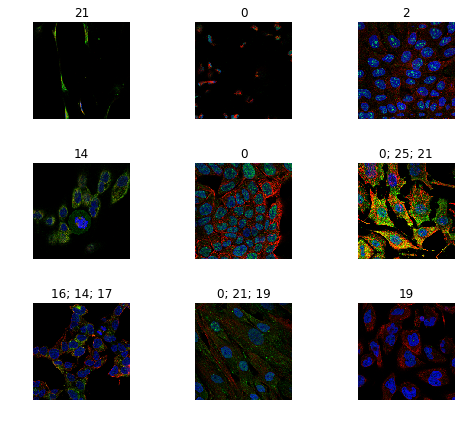

In [9]:
data.show_batch(rows=3, figsize=(7,6))

In [168]:
data.classes

['16',
 '0',
 '7',
 '1',
 '2',
 '5',
 '18',
 '25',
 '23',
 '21',
 '24',
 '6',
 '11',
 '3',
 '12',
 '13',
 '14',
 '4',
 '20',
 '22',
 '17',
 '19',
 '8',
 '9',
 '10',
 '26',
 '27',
 '15']

In [169]:
len(data.classes), data.c

(28, 28)

In [144]:
doc(error_rate)

In [11]:
fbeta = Fbeta()

In [12]:
learn = ConvLearner(data, models.resnet34, metrics=fbeta)

In [10]:
torch.cuda.is_available()

True

In [13]:
fbeta = Fbeta()

In [15]:
learn.fit_one_cycle(1)

VBox(children=(HBox(children=(IntProgress(value=0, max=1), HTML(value='0.00% [0/1 00:00<00:00]'))), HTML(value='epoch  train loss  valid loss  fbeta<p>')))

Total time: 04:11
epoch  train loss  valid loss  fbeta   
1      0.152199    0.146085    0.064481  (04:11)



In [16]:
learn.fit_one_cycle(4)

VBox(children=(HBox(children=(IntProgress(value=0, max=4), HTML(value='0.00% [0/4 00:00<00:00]'))), HTML(value='epoch  train loss  valid loss  fbeta<p>')))

Total time: 14:39
epoch  train loss  valid loss  fbeta   
1      0.144820    0.138900    0.101649  (03:48)
2      0.135870    0.128991    0.156719  (03:38)
3      0.128526    0.123904    0.166977  (03:48)
4      0.125207    0.122209    0.172452  (03:24)



In [17]:
learn.lr_find()

VBox(children=(HBox(children=(IntProgress(value=0, max=1), HTML(value='0.00% [0/1 00:00<00:00]'))), HTML(value='epoch  train loss  valid loss  fbeta<p>')))

In [18]:
learn.recorder.plot()

In [19]:
learn.save('../tmp/protein.pth')

In [20]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(1, max_lr=slice(1e-6, 1e-3))

VBox(children=(HBox(children=(IntProgress(value=0, max=1), HTML(value='0.00% [0/1 00:00<00:00]'))), HTML(value='epoch  train loss  valid loss  fbeta<p>')))

Total time: 04:31
epoch  train loss  valid loss  fbeta   
1      0.123241    0.119338    0.191460  (04:31)



In [22]:
learn.save('../tmp/unfreeze-protein.pth')

In [13]:
learn.load('../tmp/unfreeze-protein.pth')

In [23]:
doc(learn.get_preds)

In [24]:
preds, y = learn.get_preds()

HBox(children=(IntProgress(value=0, max=50), HTML(value='')))

HBox(children=(IntProgress(value=0, max=50), HTML(value='0.00% [0/50 00:00<00:00]')))

In [26]:
preds, y

(tensor([[ -5.5620,  -2.1045,  -3.1021,  ...,  -6.6269, -13.8224,  -9.4366],
         [ -6.7432,   0.5456,  -5.1646,  ...,  -6.6359, -16.4527, -10.8535],
         [ -5.8040,  -3.6852,   1.0618,  ...,  -8.7221, -11.3996, -13.9390],
         ...,
         [ -4.6987,   2.0171,  -3.5195,  ...,  -4.4237,  -8.7624, -10.0552],
         [ -6.6506,  -1.0178,  -4.0449,  ...,  -6.9211, -12.7445, -14.0011],
         [ -4.0302,   0.1561,  -2.2487,  ...,  -4.6797,  -9.4897,  -8.9046]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.]]))

In [14]:
pred_test, y_test = learn.get_preds(is_test=True)

HBox(children=(IntProgress(value=0, max=92), HTML(value='')))

HBox(children=(IntProgress(value=0, max=92), HTML(value='0.00% [0/92 00:00<00:00]')))

In [15]:
len(pred_test)

11702

In [29]:
len(y_test)

46808

In [42]:
torch.max(pred_test[0])

tensor(0.8330)

In [44]:
def predict_top_k(pred, k):
    top_preds = torch.topk(pred, k)[1].tolist()
    return " ".join(map(str, top_preds))

In [17]:
predict_top_k(pred_test[0])

'1 8'

In [54]:
torch.topk(pred_test[0], 2)[1].tolist()

[1, 7]

In [46]:
top_predicts = list(map(lambda x: predict_top_k(x, 1), pred_test))

In [47]:
top_predicts[0]

'1'

In [19]:
len(top_predicts)

11702

In [53]:
pred_test[0]

tensor([ -2.9099,   0.8330,  -3.3751,  -4.1108,  -3.6641,  -1.3189,  -3.7060,
         -0.2954,  -4.3440,  -2.7723,  -7.9085,  -4.9825,  -5.3447,  -3.1754,
         -4.4307,  -4.7966,  -1.2253,  -2.4128,  -6.9665,  -4.3599,  -5.4639,
         -2.4119, -10.2038,  -8.9171, -10.4362,  -5.4640,  -9.1380,  -8.7943])

In [68]:
map(pred_test)

tensor([[ -2.9099,   0.8330,  -3.3751,  ...,  -5.4640,  -9.1380,  -8.7943],
        [ -4.2874,  -0.3680,  -4.3666,  ...,  -6.8030, -11.1511, -10.7183],
        [ -3.8082,  -0.1457,  -5.2371,  ...,  -6.0684, -12.4388,  -9.6025],
        ...,
        [ -3.2038,   0.1837,  -2.7985,  ...,  -5.7414, -11.0629,  -9.7198],
        [ -3.7179,   0.6615,  -3.9842,  ...,  -5.5247, -10.5181,  -7.8878],
        [ -5.3889,   0.3310,  -4.2103,  ...,  -5.8827, -11.7039,  -9.0180]])

In [83]:
dir(data.test_dl.dataset.fnames)

AttributeError: 'ImageMultiDataset' object has no attribute 'fnames'

In [88]:
dir(learn.data.path)

['__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__truediv__',
 '_accessor',
 '_cached_cparts',
 '_closed',
 '_cparts',
 '_drv',
 '_flavour',
 '_format_parsed_parts',
 '_from_parsed_parts',
 '_from_parts',
 '_hash',
 '_init',
 '_make_child',
 '_make_child_relpath',
 '_opener',
 '_parse_args',
 '_parts',
 '_pparts',
 '_raise_closed',
 '_raw_open',
 '_root',
 '_str',
 'absolute',
 'anchor',
 'as_posix',
 'as_uri',
 'chmod',
 'cwd',
 'drive',
 'exists',
 'expanduser',
 'glob',
 'group',
 'home',
 'is_absolute',
 'is_block_device',
 'is_char_device',
 'is_dir',
 'is_fifo',
 'is_file',
 'is_reserved',
 'is_socket',
 

In [94]:
dir(data.test_dl.dataset.y_kwargs.values)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__text_signature__']

In [20]:
fnames = data.test_dl.dataset.ds.x

In [22]:
fnames

array([PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/32647078-bad6-11e8-b2b9-ac1f6b6435d0.png'),
       PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4cb87782-baca-11e8-b2b8-ac1f6b6435d0.png'),
       PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c0fe9b60-bad6-11e8-b2b9-ac1f6b6435d0.png'),
       ...,
       PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a89f74fc-bad8-11e8-b2b9-ac1f6b6435d0.png'),
       PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/23b87b4a-bacd-11e8-b2b8-ac1f6b6435d0.png'),
       PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/16864798-bad4-11e8-b2b8-ac1f6b6435d0.png')],
      dtype=object)

In [108]:
fnames[0].stem

'028229f2-bad8-11e8-b2b9-ac1f6b6435d0_blue'

In [109]:
TEST_DIR = Path('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test')

In [112]:
test_fnames = list(TEST_DIR.iterdir())

In [114]:
test_fnames[0].stem.split("_")[0]

'028229f2-bad8-11e8-b2b9-ac1f6b6435d0'

In [23]:
unique_keys = list(set(list(map(lambda x: x.stem.split("_")[0], fnames))))

In [48]:
df_test = pd.DataFrame({'Id':unique_keys, 'Predicted':top_predicts}, columns=['Id', 'Predicted'])

In [49]:
df_test.head()

Id Predicted
0  0c38226a-bad0-11e8-b2b8-ac1f6b6435d0         1
1  68df4c62-bad7-11e8-b2b9-ac1f6b6435d0         1
2  b46bafd4-bacf-11e8-b2b8-ac1f6b6435d0         1
3  0e78c6b8-bac8-11e8-b2b7-ac1f6b6435d0         7
4  02352fa8-bad8-11e8-b2b9-ac1f6b6435d0         1

In [50]:
df_test.to_csv('../protein_test.csv', index=False)

In [43]:
FileLink('../protein_test.csv')

/home/edwin/Developer/kaggle-comps/protein_test.csv

In [32]:
df_sample = pd.read_csv(ddir/'sample_submission.csv')

In [33]:
df_sample.head()

Id  Predicted
0  00008af0-bad0-11e8-b2b8-ac1f6b6435d0          0
1  0000a892-bacf-11e8-b2b8-ac1f6b6435d0          0
2  0006faa6-bac7-11e8-b2b7-ac1f6b6435d0          0
3  0008baca-bad7-11e8-b2b9-ac1f6b6435d0          0
4  000cce7e-bad4-11e8-b2b8-ac1f6b6435d0          0

In [31]:
! ls {ddir}

models		       test	 test.zip  train      train_png
sample_submission.csv  test_png  tmp	   train.csv  train.zip


In [122]:
len(unique_keys)

11702

In [124]:
TRN_DIR

NameError: name 'TRN_DIR' is not defined

In [130]:
TEST_PNG_PATH = Path('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png')

In [131]:
def save_test_png(fname):
    id = fname
    im_rgb = open_rgb(TEST_DIR, id)
    new_fn = str(TEST_PNG_PATH/f"{id}.png")
    if os.path.exists(new_fn):
        print("SKIPPING - PATH EXISTS")
    else:
        print(f"SAVING - {new_fn}")
        plt.imsave(new_fn, im_rgb)

In [132]:
unique_keys[0]

'76ab092c-bac7-11e8-b2b7-ac1f6b6435d0'

In [133]:
save_test_png(unique_keys[0])

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/76ab092c-bac7-11e8-b2b7-ac1f6b6435d0.png


In [134]:
list(map(save_test_png, unique_keys))

SKIPPING - PATH EXISTS
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/65d7a61a-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b847ca46-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f00574f0-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cc42b63a-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/08fccea2-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/79e65cba-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/00db3cb8-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competiti

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c71b30d8-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3c4cfd3c-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c8807af2-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/76d523d0-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7dbe7d90-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2c9f1aa0-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6dd8d096-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0d373fcc-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bcf4f8a2-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/abbed492-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/216caad4-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eb85087c-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ff7dc452-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f6736e50-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eeda5f6a-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f3f545e4-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/dff77f18-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7717bd6e-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b7f30254-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d7096278-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9e45d2dc-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3f32b622-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0a14d402-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ed131132-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3f31506e-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e9504430-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8d18350c-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/74075840-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/02aa2a80-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8dacad0c-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0bf09f34-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/17bae64a-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/15f4f4d0-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bee1beac-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/63d7694e-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/676e29ae-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0ea60f06-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c0640086-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9d80a104-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d1f188f4-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/07c1786a-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8bf3f5ae-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/90ce3094-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6911231e-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/58a0fc6e-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/81757bae-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2b7b3f78-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2597dfb2-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/943f5b04-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a0f9a2fc-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7b30bc22-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c1bb6c9e-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cacf0a6a-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8e5b8c94-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/97aa6380-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/83187de6-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/12ff1d56-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eb9ff414-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ea037202-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/edf6c594-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c9a1f082-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/748ad66a-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/266127ae-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6e57f3ca-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1bb67ee0-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4ee382ee-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2aeefc76-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0339c228-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/77d0cd44-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2f058f98-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1bb72d48-badb-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0cc84706-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9dfdd97e-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5c72c580-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/952faea6-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cb95a28c-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a91d5c48-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0962ca88-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/988aea2c-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cf2f5cd4-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/304cbe50-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/128d5f7a-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/24787bfa-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/704ca29c-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bdfba490-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e2a09330-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/acfddaae-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/33b00478-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d7dab5e8-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b18eccee-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d49620b4-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4d1c7992-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6ab2b850-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/946dae7e-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8df51652-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/38047968-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c2809b04-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c863e18c-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cb1abcd2-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ab38697e-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4455c48a-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0a836bb8-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a98b954c-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d00bb8a6-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c9c391a8-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/77161884-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cfdba7ac-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/55d40278-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a041062a-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4421dc4c-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aea32ad6-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/63532aa0-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b34ed666-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eb5d8d76-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/acedd882-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4c8568fe-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8ee7e444-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9d6a9bf4-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c2449884-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e96845b6-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2b4309f4-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fd097aec-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8b5a654e-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4c69eb9c-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a8572ab6-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/750af796-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/994a70e6-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/dfe6e186-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5e490822-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/28af815a-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e59f1eec-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/75f0c366-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3fc00b8a-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aa0131c0-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f26eecb2-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/268b3b7a-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/76e3d960-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/edb8ee4c-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2a9173b8-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a2f5e6a6-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a648fade-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ccf763f6-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c7b6862e-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5eacee62-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6e9c4dfe-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a785193e-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0e78c6b8-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c859fe32-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/28601ba0-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1309b32e-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ffb91448-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/adf4233c-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/95367406-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/95ccf3d6-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0d4bd0fe-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/be44ba06-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fef2f6b0-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/09ca1fdc-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4f5cf6a0-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8a533940-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/247bece0-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3c512488-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6d99673c-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/89212bc0-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/904ffa44-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e4768370-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7dbb5238-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/768051ce-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/11d2bbcc-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/51636244-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/24ca0fee-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9c7a0808-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c5b837ca-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0947a4de-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5eb8818e-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8f3f2cf2-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/af9f5ac0-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/41c226d8-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/826ab63c-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/60f053d2-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/09a679b0-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4a410f6e-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/addbcb56-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/46786f8e-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cddd9b0c-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f0c39d26-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c1793668-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a3e1294a-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/714a34b4-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e0cc81d0-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1a035378-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/78041b76-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b7d98f18-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/46ae7ea0-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/42431f66-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/29fca996-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2ba6c4f6-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5ef78d66-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/317474a4-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c3e141c6-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d591c3ae-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/62549e30-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/25772c50-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/779b9a9a-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/23cf1252-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b33ae170-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/409cfc94-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f1ea49dc-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/90b346f2-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b9dbe68e-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/43566ae8-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/813f8eb6-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e7bee7c4-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1af9a29c-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fca36326-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/757eebea-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3779dfa2-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e8c2d8f8-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/194c35a8-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/acc65f18-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5d8f0efe-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b278d1d4-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/217acd92-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3020ed2a-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ca2b8ff8-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9a46ff26-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0fc274e0-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ef84700a-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/49dc055a-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/12c0f890-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ec796b96-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/09b890b0-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3625b3e4-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/44031658-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9a474fb0-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a1209c74-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f23c57e0-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c4d46cd2-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b810041e-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/624fea78-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6ea19248-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/babf0086-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8105851e-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7be40d24-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b59efdd0-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a54575d0-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4abe9854-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ac542238-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bcda9926-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b2e59380-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1b0cecf2-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/858112e4-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/66606722-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/be6e3702-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fc3c245a-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ffd91122-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/596a41b6-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2b13f048-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5ff66762-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/febff930-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/421b1cfc-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/680c456c-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b4b49b18-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cb9339dc-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6130637a-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0006faa6-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c60c58b8-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ce18ce78-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9e5cee3a-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/428a49da-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/699366ba-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/099c0526-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4bbda434-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/46b36604-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/86863b5c-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3c91eacc-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6147c53c-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ac0315ee-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/951ec354-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/de0ed5c2-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b2793256-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/798f7080-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aeeb3976-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6c0a7450-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/642b6eea-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a93bd3f2-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8b80f84c-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/616173f4-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7dce7aca-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/24bba072-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ee662372-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/16bff9fa-badb-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d70380fa-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5ae47e3e-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/35208eb6-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3e88bbd0-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3da7dc4a-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/391f04e2-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ac87e95e-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f7994356-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e81e936e-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/68addd42-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0d9dbb5e-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/be3078fc-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ea2f8956-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e8b344ea-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/857c514c-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bbe013c0-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b68295aa-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/671c875c-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d2dbc822-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/40e2bc2a-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bc9a3038-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1845eb92-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bb72830c-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/094f9df2-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f40e0f60-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ace9ce46-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2ca73cc0-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3b337538-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/52f03ab6-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f13c086c-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5df4d8de-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b7929920-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/40b88aa2-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0206b414-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/89e54f14-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3613c84e-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3a148b76-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b0d15614-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f41ebdbe-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/29fb90b2-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/025d82d0-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/881ee918-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4d8dd07e-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/97e63c8e-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1f3edbce-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8ccdb2ec-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d49e3526-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ca53d97c-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c505a4f4-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/85352d18-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/82c5dee8-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fa9f5cde-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eb236434-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/361decc2-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/87429c02-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/87545a90-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cf5a9650-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e55c8f0a-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4e46c27c-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4ce00c02-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/addaac94-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/dd602e58-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aa11baa8-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9bc6a800-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/852cd802-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9c105be2-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cb9c643e-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e8ced2e4-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8823d9cc-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/816dbaa2-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6f2c7bd2-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ec9b7c58-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/272c486c-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/403261e8-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/59d92c40-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a83df4a6-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7e836c22-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/33bd8638-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3fd65060-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2707c1f4-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/32dc96be-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f571288a-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d035b87e-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6955d2dc-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/82e21792-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/22685d68-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b39e21cc-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/74ae4e4c-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2a31a228-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a6706d02-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4ad7d35c-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5d2711a6-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/63453fea-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e4e2d48e-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ac153242-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/adf393f2-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/38fa88b4-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/44616d6c-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c72dc248-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2b876fea-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/38fc3ab2-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aa45019c-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/32d23612-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8589f562-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/59a01220-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/77e1a5ae-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/155a49dc-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/007eca68-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/93c3f0d2-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a276fc06-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3238ba5a-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f1b97ac4-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0317fdf2-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/53053cba-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b6741ad8-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/da0d1860-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c733e498-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3057ec12-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3110c84c-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fee59ad6-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/87662106-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a561de46-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/10e3343e-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/842e0c12-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2d12ed56-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2852e2fe-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c1932a86-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ce5fda64-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b30fb19a-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/91c97532-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bc176ecc-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b0628f98-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f5f558ae-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7f5c4832-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/412036aa-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/16bf18c8-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/34d90798-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/85ed9cd0-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4e4b98fa-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/14076f70-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1f2627aa-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ae4597ba-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f1c776c8-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/87225f2a-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/def87634-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b5f1bb34-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d1e24928-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/dcd1703c-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/adc6bcba-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0075ee26-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cfd95666-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/77ec1cea-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2dcdd948-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e249c51e-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9e643e14-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/53fee602-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cf8250b6-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9f7233ae-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7bba5826-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fe97588a-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7ad2feec-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b3fc0b6a-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/10f2f520-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b7726822-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b9fe9c74-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0fb360fc-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a25ccbea-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c1dc11c4-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8527dd06-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c33848a4-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6054d53c-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/624eb76e-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a9a6859e-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/99888dca-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e06dc526-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cc2cf0f8-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/338d7ec0-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d7689d4e-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6e7200e6-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4d5ece6e-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d8ae6726-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3a466a8c-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1f95b5ce-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f9a3fe3c-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eff8f1f0-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/be920bec-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9af278c4-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2935b396-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8d0411fa-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/45c38a48-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b5837ec2-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5243253e-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cb51c314-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6f687baa-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b32b6d04-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/39ea05f8-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a91c6d20-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/549adf02-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4a371388-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/376baba0-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4e402066-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3df2241a-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/82324bda-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/681d3f40-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4dd66282-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/db597f0e-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3230cac2-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0918d982-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e528fea6-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/54ff9128-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4db84f3c-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d23d1f92-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c11bf698-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/35e703be-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2cf9d91e-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e120bb3e-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5b45fe4c-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ed985fce-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/676c6894-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aec34ecc-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fe670970-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eb8fd98e-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a7b741fa-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d50e884c-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9bbf8714-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0e98815e-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/994f1894-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/98b6d666-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9a63e8b4-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4ab912fa-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5651202a-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1e9f815c-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1449fe50-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/33be4b6c-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/902f74a2-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0ca05e9e-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a14399ee-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/225a1c04-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/78a17ef6-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c09cdd80-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4927ce6c-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a750ebd6-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9b14094a-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a0801c16-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ad21c86e-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a5746d74-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/26b6fabc-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8241a39e-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ae0b22d2-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/910c8368-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/52c20b9e-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f8718b22-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5518c1cc-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9490d334-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7dfc6326-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a4ebab20-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f0536ce4-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6df7237a-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e778049a-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/92154068-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b3818872-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/12763248-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/196525c2-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/55fd7192-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2932370e-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5c50ef7a-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8d686728-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c2bca628-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fa6877dc-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9932fa46-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c54b4f58-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8497b556-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/09cda288-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8e6c1104-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/edb5b41e-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e8e7cbd4-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eae7bc18-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4c837dd8-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/20ca8038-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b4b93a96-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/265ff346-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/df11fb42-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/366211e6-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/694b7840-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/14285f2a-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/07b78498-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fb0e2488-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d510ee1e-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a07bd432-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4467ab16-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/de5f9d38-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/478236e0-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/93798ac2-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2ea9172a-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/665ea44c-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d310616c-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6e686e54-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/eb443446-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9d5eeae0-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/94e36f08-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cd0184e6-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d0076374-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3f0d0104-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d0b035d0-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d32dd82e-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/dde35bc4-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/99cdd86e-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/15efe29e-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5a98404c-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ace6a196-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9a2cad34-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/790f39e4-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fb7982f6-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/58a0b5e6-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/94242060-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ac52ddf4-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3855197a-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6ec16f2c-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/33fe5e38-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5dc7da0e-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f82de560-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3aa0b622-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b68b9c7e-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/722573e2-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0aff2ad2-badb-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/708b6baa-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/562171fc-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b0742f50-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0c87606a-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e9cf391c-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7e9d3e22-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1d2ed396-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6f5342e2-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/56d2d502-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3863b436-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e505c73a-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d8eb3efc-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a45dc936-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3825f05a-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3330618e-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6e60096c-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/edfd0548-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3d24bf54-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/33f46de2-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ff9ccd2a-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e10066ba-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aeecccb0-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/31cf16dc-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/144afe58-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8c1b415c-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1830192e-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/24ad2ee2-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7edbab4e-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a3fb3030-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/27ca9b0e-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a1794e1a-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/75eb3c3e-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4bca19ac-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c3da1108-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/48532fa2-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fac89012-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c12fa736-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/10582ba6-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/73f1e052-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/17c5d06c-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/30bab06e-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9c5a3640-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c0a18fae-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/90d8eba8-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/59887380-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f093434e-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fe4db5c2-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d3accbee-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b4c86aa8-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fcfaae16-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/79b9bd60-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/60ea5658-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ec2414be-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7a50c6c4-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8d3007e4-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/60058f68-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/63341cc2-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4d29863e-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4a72cd3a-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/be6cffca-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/27e9a582-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b44bb53a-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/68477f9e-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9f584d72-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6f24a27c-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0b303e20-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e9ade596-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c759d266-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f073360e-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/450c32b8-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f0430f9a-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aef91fd2-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3cbc1556-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b60794fa-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e65a9e22-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/23163860-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c632f25e-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ce74d7ca-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/23621d60-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2644bd50-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e99576f8-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7c9207e8-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/21c460c2-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c909bf0c-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ab2e7e96-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c9f1c3ce-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5bdbd622-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/89ccc7d2-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9a78a6c8-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a6539422-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2cccfa86-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/57f327c8-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/05a16ace-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c6662cc8-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/178b2d46-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/78ee825c-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/556c050e-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3b1f4292-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7310bde4-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b9246108-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/efb11d60-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cd8b2ab8-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6e833032-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3649f3ac-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1952fc6a-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9d93e754-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7b08a708-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/26be61ce-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e4900716-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7df51e72-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8464006e-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/07e9faf4-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/829e7fce-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9221074e-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/11fbfaf2-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bfa1f7a0-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3139859a-bad5-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/40473a74-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9df4f6de-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1719a042-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0b21cf66-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/df920b8e-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/82635314-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f957fd58-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/444a6f42-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/de5687f8-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/00ba25e2-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d9d8d688-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d4626e66-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/033bbeda-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/41b8226c-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e1ef0b36-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e768d2d6-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c5beb4b4-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/abe417ee-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f5dcb0b6-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fb19471e-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ef627630-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a6d8752a-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bffd3e16-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f20035f6-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fe5b8516-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3fa8c038-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1c03b182-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/94450c92-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d69ade6a-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d8703da8-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/082246c2-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/db115c60-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/658ae09a-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e3900c96-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4eeecb36-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/50b720fe-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c041d722-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/85b61bc4-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/83142244-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b86991a4-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2e570c6e-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/39795ac2-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/63fa653a-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d515b42a-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/932270b8-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1438737a-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e447dc88-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4104fc8e-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3ec77006-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cff1644a-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/00200f22-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cc496ebc-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b800472a-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/803fc6ae-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fc154ab4-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c0e2f330-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fd28dd0a-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9f51de12-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/22f2e700-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1a170252-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f1cb55e4-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6f540cfa-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6457a782-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1eea11c4-badb-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/48824cbe-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/96f0a85a-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6bacd9d8-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/13ab8d4e-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4f0e730a-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6f5ae49e-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e2d0e834-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/64fedf46-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/22302ef6-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/83614a12-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/62a4e8f0-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ad09efb6-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5b75a4ba-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6687a79a-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6262c7d2-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/79078d6a-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4c89b35e-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d51dd428-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c246b96a-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6a3cdfd0-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fa1ca3da-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/107d6830-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a0d42da4-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2f5117c2-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/da9ed950-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9be309ca-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0b42d0ae-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8c31edbe-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/48218f3a-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/397c3d4e-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d2abd42e-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/34a909fc-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e7c5dc34-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e4e97dbc-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/95b1356e-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/af2190b0-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/37dcb5fe-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4a71549c-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/00ad3e84-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7429b484-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3a37579a-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9d9671fc-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f665e29c-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2c49d56e-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d48e0798-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/615bbdec-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/00bb4f2a-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5aa17b20-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d56bdc3a-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/33544b0e-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2db56608-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7b869a0e-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4ad13d70-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3e95f238-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/299600d2-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/19b358a8-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/64ffbe78-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e4be829c-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/45ebc326-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bcf2d1d0-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/48b1d556-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ec85689c-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a94b2fd8-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b49db592-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c91c5460-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d79a3028-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c3ff8e78-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f66ad982-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/091df990-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/040e4670-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/26320db0-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f1f7011a-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2ba123a0-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/584d194c-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/52a429bc-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c5ce189e-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8a53cb2e-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c08c8b26-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1401b860-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/56abe318-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3504d636-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6d442600-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d9cfa356-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f33fe7fc-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/813bb904-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/283e7f02-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fb8156a6-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c95d8f7e-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4ec0d61e-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/df53dc3a-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1942299c-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2f0d8f16-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a64e1d06-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a457e5ae-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/92414490-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3f24a7ee-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ad1c483c-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e2173864-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2dc0cf00-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bc79851e-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a787cfb0-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4a693326-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6cff3880-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0e8d1ff8-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9ded793a-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d6aef21e-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/349dfd30-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5ef7896e-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8921faf4-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0cab24d6-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/12fcc920-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/69730236-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/774ed8fc-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4ae55a42-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f071ceea-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/796a5d82-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f687a036-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d68065f4-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cf1f7cba-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7eb4b084-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c98209b6-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e0c58216-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a9dbf6c4-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7d6827c4-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/53533d0e-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/12fdc9c8-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2298ed50-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/22fbf88c-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3a53ecca-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6b6dfc78-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ea9e6a32-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/675d4f84-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/33066572-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a846be32-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/510f3694-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bb4dc0c0-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e72a2326-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7fcf95d6-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e03fd9d4-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/8b358064-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/94972aee-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/92184282-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4b7c3900-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2574e018-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/073f7878-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a18189b0-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3a45a49a-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e4a4b378-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/66072d5e-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0c0ecdd2-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/daf9c422-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0d435d8a-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/56e37ec2-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f21e8aa0-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/603a0fc4-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0c3c57fe-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fb79f34a-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e2d8c044-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f6577616-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fcff314a-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/dfed3c2e-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/99f94eba-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e65f55fe-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/79bf374c-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6fbe2c42-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/483fbf6e-bac8-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6defa9f0-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/28689536-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/314e08b8-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c7c651c0-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a1d557aa-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/231e1dd4-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ef1a38fc-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/849b753e-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/160f309c-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6c00246e-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d7426eee-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/56f1f414-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3913aa62-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d5160130-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/cc581bb0-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2b741b70-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ba9e0c72-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f63059c8-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/77fcbf10-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0e244f46-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6563a582-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/aa9f1cb0-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f73cb6dc-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2eb67804-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/79f4fe16-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/25fcabc8-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/acee2768-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f27b681a-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ac109d66-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c5735ec6-bac5-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fed5e4e4-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/018f06ec-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ab5f5140-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d958cb60-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9899cd20-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1006e052-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0808e47a-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/788f9948-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/adf0896e-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/26c26fcc-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f4c45058-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1fa31e60-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6fc291fe-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/92bc1472-bad5-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/fca4669e-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b322915e-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2c1fa200-bacc-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/06eaed86-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4d3971d6-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b6193010-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5786fca0-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/96d01572-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/01861f5a-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a57289c4-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2ab3a4b6-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5a74af9c-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d9bce376-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6bc570bc-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/008e8c3e-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/01e7dc3a-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7ebcaada-bad6-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/17683650-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bc0b8c64-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c31b522c-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2a9a0ffc-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2624bb28-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/38e63464-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/58c0d0bc-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d0a99c74-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/814433c0-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6d0049c6-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0238dc88-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/bb5952d0-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/22cb6fa6-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3d8474dc-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f2d509ee-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7ea46c7c-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/2cbfd8fc-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f6e88b48-bad9-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/0c258434-bada-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b6a9ba7c-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4738e5e0-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/4db0da8e-bac6-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/30c0eefa-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/f1f1d1ea-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/d3fe2072-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/84c046b4-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a5e7f7ec-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/44ca9f62-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6b893b5c-bace-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e3dee544-bad7-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3f626450-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/6b9060e8-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c583fcd2-bad3-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a205b698-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/15a59458-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/65a69196-bac7-11e8-b2b7-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/710b8ff6-bad0-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/e0ed7420-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/5c2da0e4-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/a1effff4-bacf-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/3d8b8736-bad4-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/96051cb2-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/efd0efd0-baca-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/9e64ade2-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/1147e2ec-bad8-11e8-b2b9-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/78ad40fe-bacd-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/c330e6e6-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/7c9015d4-bac8-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/ca6d0032-bad2-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/895612ae-bac9-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/652a8c5e-bad1-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/b2cdde94-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas-image-classification/test_png/25793610-bacb-11e8-b2b8-ac1f6b6435d0.png
SAVING - /home/edwin/Datasets/competitions/human-protein-atlas

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

